# Objective : To Predict whether there will be rainfall or not.

In this task we need to predict whether there will be rainfall or not next day and if there will be then what amount of rainfall would fall. So, we need to predict 2 target columns. In one we need to use Regression model and in another one we need to use Classification model.

* 1. We would use Classification Models on target column Rain Tomorrow.

#### Importing all libraries necessary for the task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
we = pd.read_csv('./Downloads/weatherAUS.csv')

In [3]:
we.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Now checking for dimensions, description and pressence of null values in dataset.

In [4]:
we.shape

(8425, 23)

In [5]:
we.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [6]:
we.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

#### From above we conclude this about dataset : 

* dataset contains 8425 rows and 23 columns.
* description of dataset shows mean, max value, min value, etc of every column in dataset which has continuous data in them.
* There is pressence of null values in dataset.

#### As there is also pressence of null value in Target column so we need to fill them first randomly.

In [7]:
we['RainTomorrow'] = we['RainTomorrow'].fillna(method= 'bfill')

In [8]:
we['RainTomorrow'].isnull().sum()

1

In [9]:
we['RainTomorrow'] = we['RainTomorrow'].fillna(method= 'ffill')

In [10]:
we['RainTomorrow'].isnull().sum()

0

#### EDA

1. Date

In [11]:
we['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2013-06-06',
       '2013-06-07', '2013-06-08'], dtype=object)

By looking at the information we can extract the year information from it to make information more refined so we can use it.

In [12]:
ab = []
for i in we['Date']:
    i = i[:4]
    ab.append(i)

In [13]:
we['Year'] = pd.Series(ab)

In [14]:
we['Year'] = pd.to_numeric(we['Year'])

Now we can drop Date column from dataset and can use Year column instead.

In [15]:
we.drop(['Date'], axis= 1, inplace= True)

In [16]:
we['Year'].unique()

array([2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2012],
      dtype=int64)

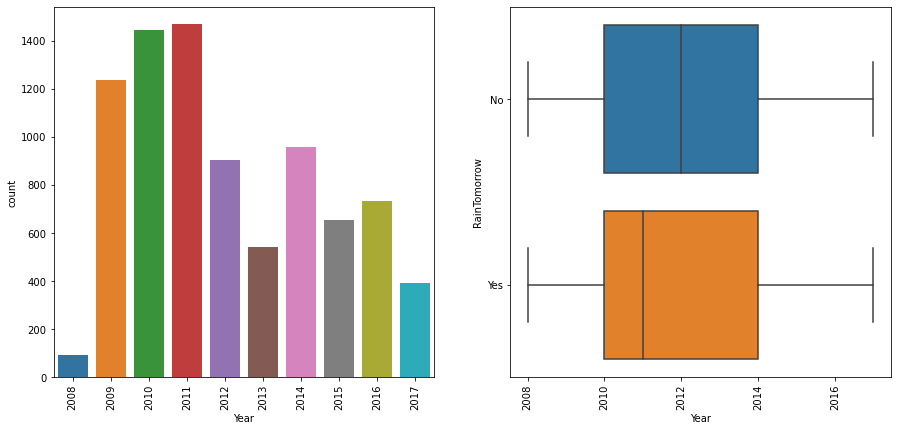

In [17]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(we['Year'])
plt.xlabel('Year')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Year', y= 'RainTomorrow', data= we)
plt.xlabel('Year')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Year we conclude that most amount of data given is from year 2011 from countplot and from boxplot we conclude that no outliers of Year is present in any category of RainTomorrow.

2. Location

In [18]:
we['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

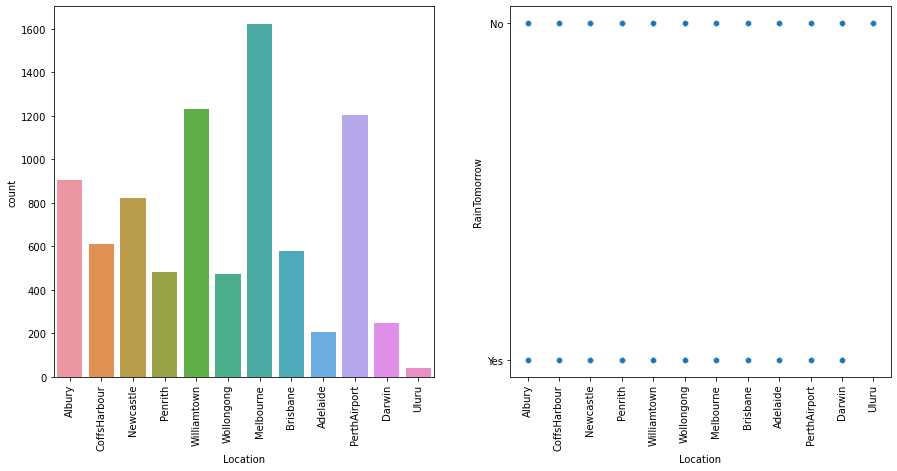

In [19]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(we['Location'])
plt.xlabel('Location')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Location', y= 'RainTomorrow', data= we)
plt.xlabel('Location')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Location we conclude that most amount of data is present from Melbourne Location from countplot and from scatterplot we conclude that every category of Location is present in both categories of RainTomorrow except for Uluru location which has only No category of RainTomorrow.

3. MinTemp

In [20]:
we['MinTemp'].unique()

array([13.4,  7.4, 12.9,  9.2, 17.5, 14.6, 14.3,  7.7,  9.7, 13.1, 15.9,
       12.6,  8.4,  9.8, 14.1, 13.5, 11.2, 11.5, 17.1, 20.5, 15.3, 16.2,
       16.9, 20.1, 19.7, 12.5, 12. , 11.3,  9.6, 10.5, 12.3, 13.7, 16.1,
       14. , 17. , 17.3, 17.2, 17.4, 19.8, 14.9, 13.9, 18.6, 19.3, 24.4,
       18.8, 20.8, 15.7, 18.5, 20.4, 21.8, 22.3, 22. , 28. , 21.5, 21.7,
       23.5, 28.3, 18.4, 12.4, 13.3, 18. , 18.7, 15.5,  8.9, 15. , 15.4,
       16. , 12.8, 13.2, 13.8,  7.6,  8.3, 11. , 20.9, 16.4, 10. ,  8.8,
        9.3, 14.4, 10.8, 10.1,  9.1, 10.4, 12.2, 10.7,  7.8,  8.1,  7.5,
        8.2, 11.6, 13. ,  9.9,  3.5,  6.6,  7. ,  5.7,  6.2,  6. , 10.6,
        8.6,  4.5,  5.4,  2.1,  1.8,  7.2,  4.6,  4.2,  5.2,  4.1,  3.2,
        4.3,  3.7,  3.6,  6.9, 10.3,  3. ,  2.6,  5.1,  4.4,  4.7,  6.7,
        8. ,  2.2,  1.7,  2.8,  9. ,  6.3, -2. , -1.3,  2. ,  0.5,  1.2,
        0.6,  0.9,  5. ,  3.9,  3.4,  0. , -1.5, -1.7, -0.4,  0.1,  4.8,
        5.9,  2.9, -0.6, -0.3, -1. ,  0.8, -0.1,  1

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [21]:
we['MinTemp'] = we['MinTemp'].fillna(method= 'bfill')

In [22]:
we['MinTemp'].isnull().sum()

0

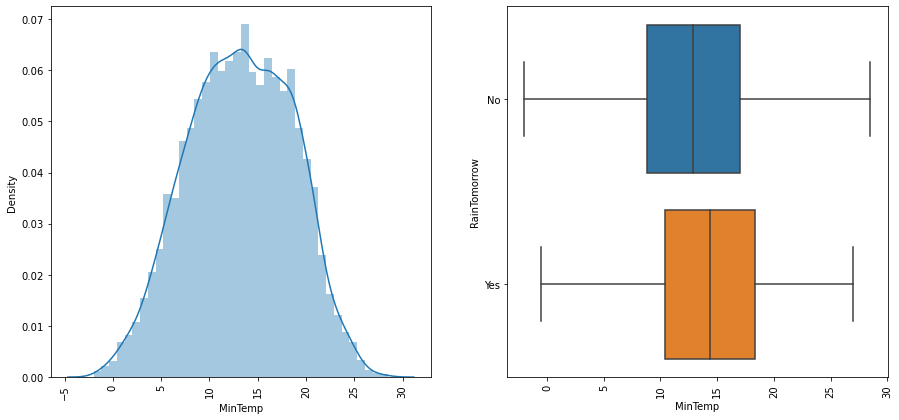

In [23]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['MinTemp'])
plt.xlabel('MinTemp')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'MinTemp', y= 'RainTomorrow', data= we)
plt.xlabel('MinTemp')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of MinTemp we conclude that we cannot determine skewness of data with having highest density at around 12 from distplot and from boxplot we conclude the no outliers of MinTemp is present in any category of RainTomorrow.

4. MaxTemp

In [24]:
we['MaxTemp'].unique()

array([22.9, 25.1, 25.7, 28. , 32.3, 29.7, 25. , 26.7, 31.9, 30.1, 30.4,
       21.7, 18.6, 21. , 24.6, 27.7, 20.9, 22.5, 25.6, 29.3, 33. , 31.8,
       30.9, 32.4, 33.9, 32.7, 27.2, 24.2, 24.4, 26.5, 23.9, 28.8, 34.6,
       35.8, 37.9, 38.9, 28.3, 28.4, 30.8, 32. , 34.7, 37.7, 43. , 32.2,
       36.6, 39.9, 38.1, 34. , 35.2, 30.6, 34.3, 38.4, 38.2, 40.7, 41.5,
       42.9, 42.7, 43.1, 38.3, 36.9, 41.2, 42.2, 44.8, 40.2, 31.2, 27.3,
       21.6, 29. , 29.2, 31.3, 31.1, 29.1, 31.7, 33.2, 29.6, 32.6, 34.5,
       30.3, 22.1, 22. , 24. , 27.9, 30.2, 30.5, 25.8, 27. , 19.7, 21.9,
       25.3, 33.5, 33.6, 30. , 31.6, 22.3, 29.8, 27.6, 28.9, 29.9, 32.1,
       28.1, 21.4, 24.9, 25.4, 20. , 23.4, 22.7, 16.2, 15.8, 12.9, 11.5,
       14.5, 12.2, 16.5, 17. , 19.2, 18.9, 19.1, 18.8, 19.3, 18.4, 19. ,
       20.5, 19.5, 17.7, 18.5, 15.1, 16.3, 16.6, 16.4, 15.6, 19.8, 21.1,
       20.3, 18.1, 15.7, 16.8, 17.1, 14.3, 13.4, 17.4, 16.1, 10.5, 11.6,
       12. ,  8.8,  9.6,  8.2, 12.4, 14.9, 15.9, 14

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [25]:
we['MaxTemp'] = we['MaxTemp'].fillna(method= 'bfill')

In [26]:
we['MaxTemp'].isnull().sum()

1

In [27]:
we['MaxTemp'] = we['MaxTemp'].fillna(method= 'ffill')

In [28]:
we['MaxTemp'].isnull().sum()

0

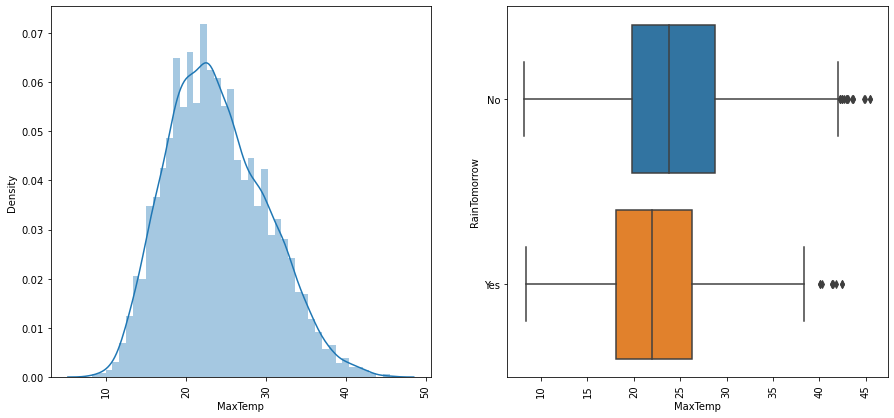

In [29]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['MaxTemp'])
plt.xlabel('MaxTemp')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'MaxTemp', y= 'RainTomorrow', data= we)
plt.xlabel('MaxTemp')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of MaxTemp we conclude that data is positively skewed with having highest density at around 23 from distplot and from boxplot we conclude that outliers of MaxTemp are present in both categories of RainTomorrow.

5. Rainfall

In [30]:
we['Rainfall'].unique()

array([6.000e-01, 0.000e+00, 1.000e+00, 2.000e-01, 1.400e+00, 2.200e+00,
       1.560e+01, 3.600e+00,       nan, 1.680e+01, 1.060e+01, 1.200e+00,
       8.000e-01, 6.400e+00, 4.000e-01, 3.000e+00, 5.800e+00, 1.160e+01,
       1.800e+00, 8.600e+00, 1.260e+01, 8.400e+00, 6.200e+00, 2.000e+01,
       2.100e+01, 3.200e+00, 4.800e+00, 4.200e+00, 8.000e+00, 1.440e+01,
       4.600e+00, 2.000e+00, 5.600e+00, 1.600e+00, 6.000e+00, 4.400e+00,
       5.400e+00, 5.000e+00, 7.800e+00, 6.800e+00, 9.800e+00, 3.800e+00,
       2.400e+00, 5.200e+00, 6.600e+00, 1.340e+01, 1.020e+01, 2.880e+01,
       7.000e+00, 2.580e+01, 9.400e+00, 1.240e+01, 5.220e+01, 2.060e+01,
       6.600e+01, 1.100e+01, 1.700e+01, 1.040e+01, 2.800e+01, 2.140e+01,
       1.860e+01, 7.200e+00, 8.200e+00, 1.080e+01, 1.540e+01, 9.600e+00,
       4.000e+00, 2.180e+01, 2.080e+01, 2.480e+01, 1.000e+01, 1.140e+01,
       1.900e+01, 2.220e+01, 3.280e+01, 3.400e+00, 5.080e+01, 5.260e+01,
       1.920e+01, 1.880e+01, 1.480e+01, 1.200e+01, 

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [31]:
we['Rainfall'] = we['Rainfall'].fillna(method= 'bfill')

In [32]:
we['Rainfall'].isnull().sum()

0

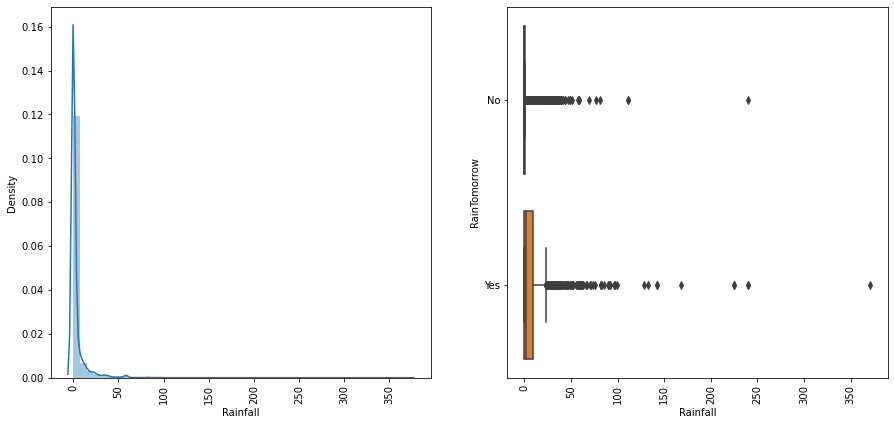

In [33]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['Rainfall'])
plt.xlabel('Rainfall')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Rainfall', y= 'RainTomorrow', data= we)
plt.xlabel('Rainfall')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Rainfall we conclude that data is positively skewed with having highest density around 5 or 10 from distplot and boxplot we conclude that outliers of Rainfall are present in both categories of RainTomorrow.

6. Evaporation

In [34]:
we['Evaporation'].unique()

array([  nan,   8.6,   3.8,   2.8,   3.2,   6.8,   4.2,   1.6,   4.4,
         4. ,   2.2,   3.4,   6.4,   4.6,   3.6,   4.8,   3. ,   1.2,
         1.4,   2.6,   1. ,   2. ,   8.4,   2.4,   0.6,   5.4,   1.8,
         7. ,   0.8,   0.2,   5.2,   5. ,   6. ,   7.6,   5.8,   5.6,
         8. ,   6.2,   6.6,   7.8,   8.8,   7.4,   9.4,   7.2,   0.4,
         0. ,  18. ,  24.2,  14.6,  19.4,  10.8,  28. ,  11.8,  24.6,
        11.2,  22.6,  10. ,  37. ,  26. ,  11. ,  19.8,  24.4,  10.6,
        27.4,  12. ,  11.6,  24. ,   9. ,  23. ,  29.2,  20.6,  13.2,
        22.8,   9.8,  16. ,  20. ,  10.4,   9.6,  12.2,  15.4,  18.4,
        24.8,  20.8,  32. ,  55.4,  17.8,  16.2,  14.2,  59.2,  33.8,
        10.2, 145. ,  16.6,  47. ,  15.2,  15.8,  12.6,  11.4,   9.2,
        14.8,  13. ,   8.2,  13.6,  12.8,  12.4,  17.6,  19.2,  13.8,
        22.4,  18.6,  13.4,  17. ,  14. ,  14.4,  15. ,  15.6,   0.7])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [35]:
we['Evaporation'] = we['Evaporation'].fillna(method= 'bfill')

In [36]:
we['Evaporation'].isnull().sum()

39

In [37]:
we['Evaporation'] = we['Evaporation'].fillna(method= 'ffill')

In [38]:
we['Evaporation'].isnull().sum()

0

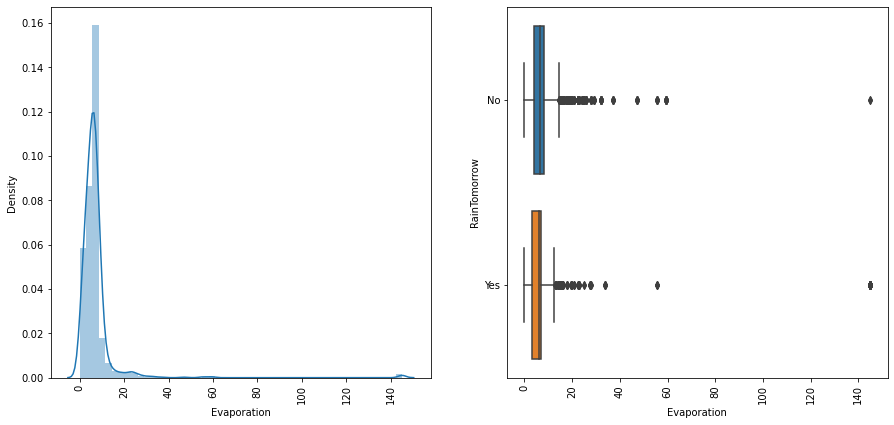

In [39]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['Evaporation'])
plt.xlabel('Evaporation')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Evaporation', y= 'RainTomorrow', data= we)
plt.xlabel('Evaporation')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Evaporation we conclude that data is positively skewed with having highest density at around 10 from distplot and from boxplot we conclude that outliers of Evaporation is present in both categories of RainTomorrow.

7. Sunshine

In [40]:
we['Sunshine'].unique()

array([ nan,  9. ,  3.4,  6.1, 11. ,  7.1,  2.8,  6.7,  6.4,  6. ,  9.4,
        6.3, 11.1, 11.2, 11.4,  9.7,  7.9,  0.3,  0. ,  0.5,  3.5,  1.9,
        1.1,  7.8,  8.8,  1.8,  6.6,  3.1,  3. , 10.4, 10.5,  9.9,  9.5,
        1. ,  4.3,  9.2,  9.8,  4.8,  8.9,  4.5,  2.6, 10. , 10.2,  9.1,
        2.2,  0.4,  0.7,  0.2,  2.7,  8.5,  3.6,  2.5,  6.9,  8.2,  6.8,
        7.2,  9.6,  5.1,  5.8,  1.6,  0.6,  7.7,  8.3,  2.9,  8.4,  4.2,
        9.3,  4.7,  4.1,  5.3,  7.4,  7.3,  2.4, 10.6, 10.3, 10.1,  2.3,
       10.7,  8.6,  5.2, 10.9, 10.8,  8. ,  1.5,  8.7, 11.3, 11.5,  5.7,
       11.9,  3.3, 12.1, 12.4,  7. ,  4. , 11.7, 12.7, 12.5, 12.6, 13. ,
        5.5, 12.2, 11.6, 12.9, 13.1,  5.4,  3.7, 12. ,  2. ,  8.1, 13.2,
       13.6, 12.3, 11.8,  7.5,  6.2,  1.2,  3.8,  1.4,  5. ,  0.8,  4.4,
        6.5,  0.1,  4.9,  3.9,  4.6,  0.9,  5.9,  7.6,  1.3, 12.8, 13.4,
        1.7, 13.3,  3.2,  2.1, 13.5, 13.8, 13.9, 13.7,  5.6])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [41]:
we['Sunshine'] = we['Sunshine'].fillna(method= 'bfill')

In [42]:
we['Sunshine'].isnull().sum()

39

In [43]:
we['Sunshine'] = we['Sunshine'].fillna(method= 'ffill')

In [44]:
we['Sunshine'].isnull().sum()

0

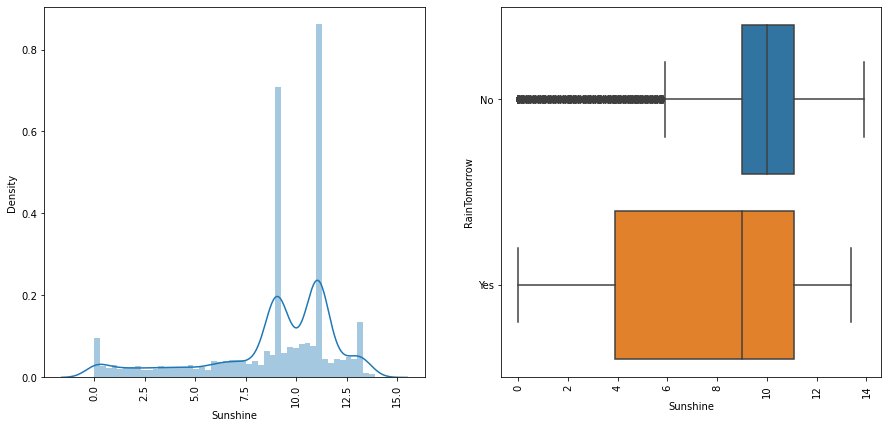

In [45]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['Sunshine'])
plt.xlabel('Sunshine')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Sunshine', y= 'RainTomorrow', data= we)
plt.xlabel('Sunshine')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Sunshine we conclude that data is negatively skewed with data having highest density at around 11 from distplot and from boxplot we conclude that outliers of Sunshine is present in only No category of RainTomorrow.

8. WindGustDir

In [46]:
we['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [47]:
we['WindGustDir'] = we['WindGustDir'].fillna(method= 'bfill')

In [48]:
we['WindGustDir'].isnull().sum()

1

In [49]:
we['WindGustDir'] = we['WindGustDir'].fillna(method= 'ffill')

In [50]:
we['WindGustDir'].isnull().sum()

0

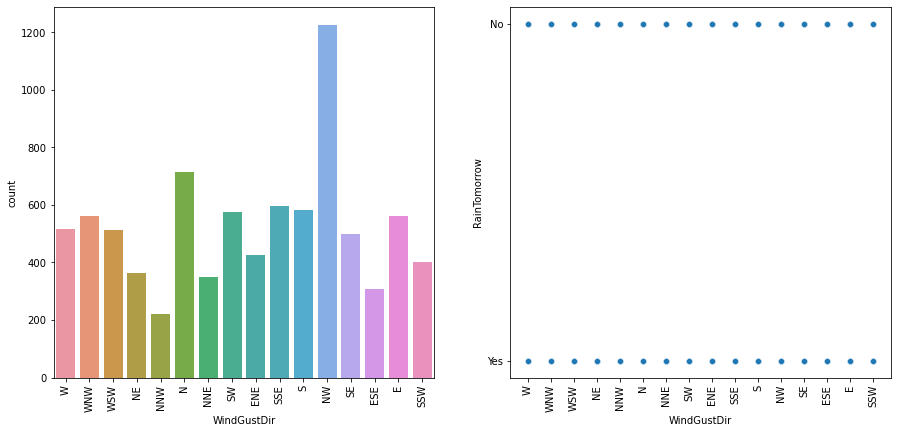

In [51]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(we['WindGustDir'])
plt.xlabel('WindGustDir')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'WindGustDir', y= 'RainTomorrow', data= we)
plt.xlabel('WindGustDir')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of WindGustDir we conclude that most data present is from NNW from countplot and from scatterplot we conclude that every category of WindGustDir is present in both categories of RainTomorrow.

9. WindGustSpeed

In [52]:
we['WindGustSpeed'].unique()

array([ 44.,  46.,  24.,  41.,  56.,  50.,  35.,  80.,  28.,  30.,  31.,
        61.,  nan,  22.,  63.,  43.,  26.,  33.,  57.,  48.,  39.,  37.,
        52.,  98.,  54.,  83.,  59.,  70.,  69.,  17.,  20.,  19.,  15.,
        13.,  11.,  72.,  85.,  65.,  78., 107.,  74.,  67.,  94.,  76.,
        81.,  87.,   9.,  93.,   7.,  91.,  89., 102., 100.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [53]:
we['WindGustSpeed'] = we['WindGustSpeed'].fillna(method= 'bfill')

In [54]:
we['WindGustSpeed'].isnull().sum()

1

In [55]:
we['WindGustSpeed'] = we['WindGustSpeed'].fillna(method= 'ffill')

In [56]:
we['WindGustSpeed'].isnull().sum()

0

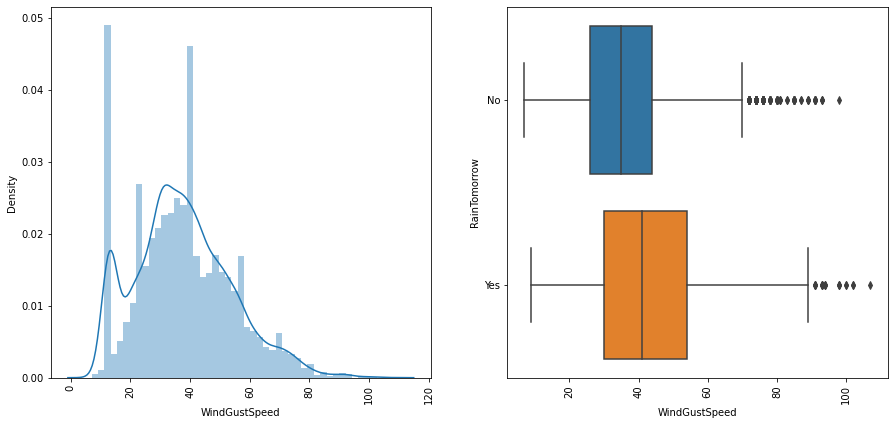

In [57]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['WindGustSpeed'])
plt.xlabel('WindGustSpeed')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'WindGustSpeed', y= 'RainTomorrow', data= we)
plt.xlabel('WindGustSpeed')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of WildGustSpeed we cocnlude that data is positively skewed with having highest density at around 13 from distplot and from boxplot we conclude that outliers of WildGustSpeed are present in both categories of RainTomorrow.

10. WindDir9am

In [58]:
we['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [59]:
we['WindDir9am'] = we['WindDir9am'].fillna(method= 'bfill')

In [60]:
we['WindDir9am'].isnull().sum()

0

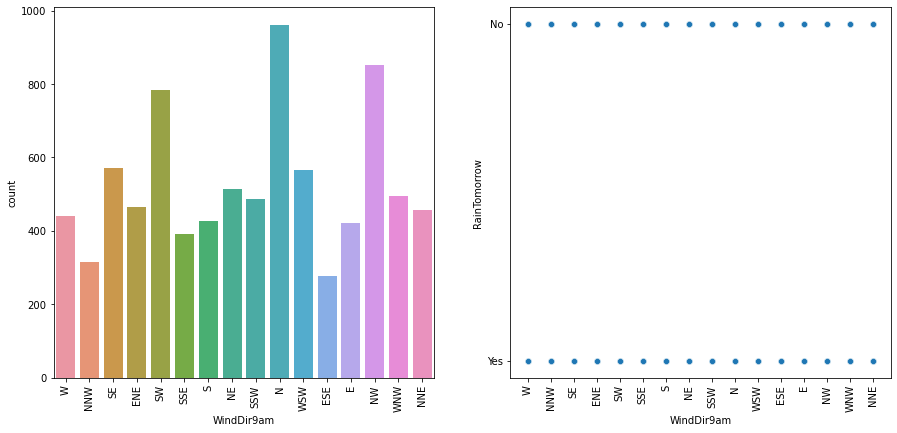

In [61]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(we['WindDir9am'])
plt.xlabel('WindDir9am')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'WindDir9am', y= 'RainTomorrow', data= we)
plt.xlabel('WindDir9am')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of WindDir9am we conclude that most of wind moving in direction of N at 9 am from countplot and from scatterplot we conclude that every category of WindDir9am is present in both categories of RainTomorrow.

11. WindDir3pm

In [62]:
we['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [63]:
we['WindDir3pm'] = we['WindDir3pm'].fillna(method= 'bfill')

In [64]:
we['WindDir3pm'].isnull().sum()

0

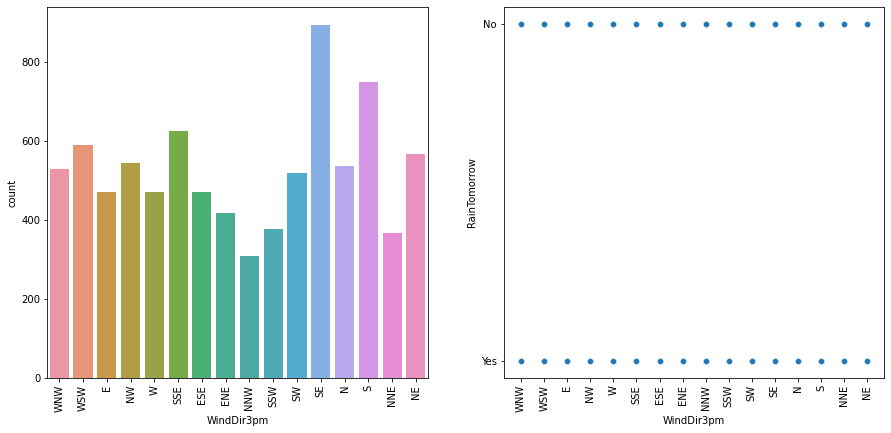

In [65]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(we['WindDir3pm'])
plt.xlabel('WindDir3pm')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'WindDir3pm', y= 'RainTomorrow', data= we)
plt.xlabel('WindDir3pm')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of WindDir3pm we conclude that most of the wind moving in direction SE at 3 pm from countplot and from scatterplot we conclude that every category of WindDir3pm is present in both categories of RainTomorrow.

12. WindSpeed9am

In [66]:
we['WindSpeed9am'].unique()

array([20.,  4., 19., 11.,  7.,  6., 15., 17., 28., 24., nan,  9.,  0.,
       13.,  2., 26., 30., 22., 35., 37., 31., 33., 43., 41., 46., 39.,
       56., 54., 50., 52., 44., 61., 57., 48., 63.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [67]:
we['WindSpeed9am'] = we['WindSpeed9am'].fillna(method= 'bfill')

In [68]:
we['WindSpeed9am'].isnull().sum()

0

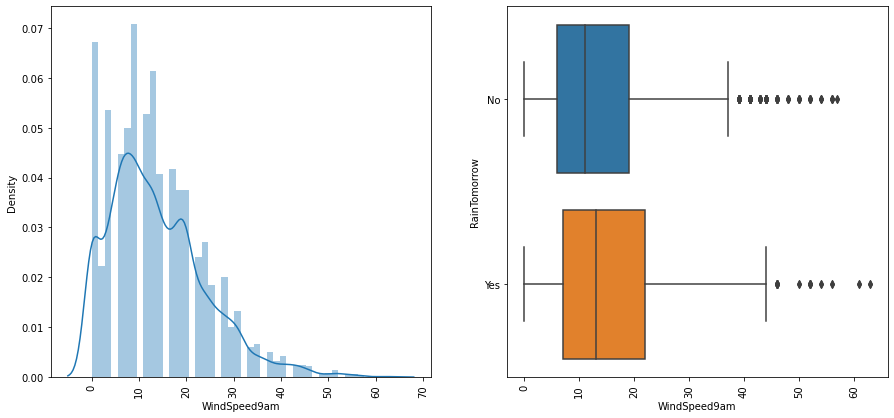

In [69]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['WindSpeed9am'])
plt.xlabel('WindSpeed9am')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'WindSpeed9am', y= 'RainTomorrow', data= we)
plt.xlabel('WindSpeed9am')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of WindSpeed9am we conclude that data is positively skewed with data having highest density at around 8 from distplot and from boxplot we can conclude that outliers of WindSpeed9am are present in both categories of RainTomorrow.

13. WindSpeed3pm

In [70]:
we['WindSpeed3pm'].unique()

array([24., 22., 26.,  9., 20., 17., 28., 11.,  6., 13., 30., 19., 31.,
        7., 15., 48.,  4., 33.,  0.,  2., nan, 37., 46., 39., 50., 35.,
       41., 44., 43., 65., 56., 83., 54., 61., 57., 52.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [71]:
we['WindSpeed3pm'] = we['WindSpeed3pm'].fillna(method= 'bfill')

In [72]:
we['WindSpeed3pm'].isnull().sum()

0

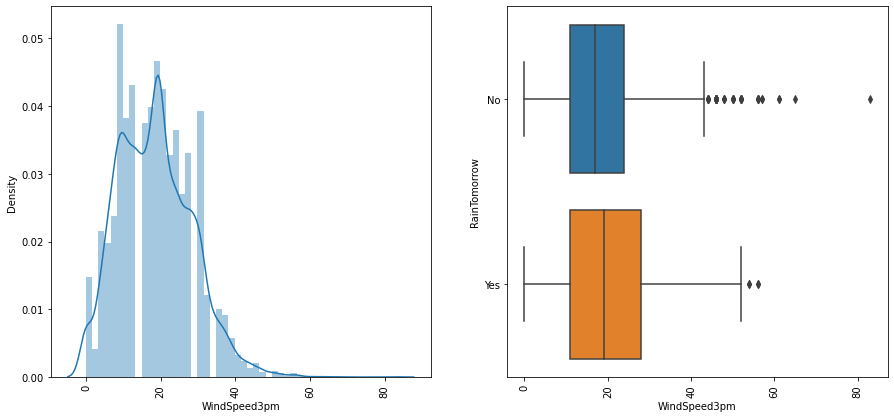

In [73]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['WindSpeed3pm'])
plt.xlabel('WindSpeed3pm')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'WindSpeed3pm', y= 'RainTomorrow', data= we)
plt.xlabel('WindSpeed3pm')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of WindSpeed3pm we cocnclude that data is showing some what positive skewness with data having highest density at around 6 from distplot and from boxplot we conclude that outliers of WindSpeed3pm are present in both categories of RainTomorrow.

14. Humidity9am

In [74]:
we['Humidity9am'].unique()

array([ 71.,  44.,  38.,  45.,  82.,  55.,  49.,  48.,  42.,  58.,  89.,
        76.,  65.,  57.,  50.,  69.,  80.,  47.,  56.,  54.,  41.,  78.,
        46.,  43.,  33.,  34.,  36.,  52.,  51.,  40.,  35.,  39.,  60.,
        37.,  27.,  32.,  53.,  20.,  66.,  63.,  62.,  87.,  61.,  59.,
        92.,  72.,  67.,  75.,  88.,  68.,  73.,  74.,  83.,  77.,  70.,
        81.,  86.,  97.,  99.,  91.,  85.,  93.,  84.,  94.,  79.,  98.,
        96.,  95.,  90.,  64.,  29.,  21., 100.,  30.,  23.,  nan,  31.,
        22.,  28.,  25.,  16.,  19.,  17.,  18.,  14.,  10.,  12.,  11.,
        24.,  26.,  15.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [75]:
we['Humidity9am'] = we['Humidity9am'].fillna(method= 'bfill')

In [76]:
we['Humidity9am'].isnull().sum()

0

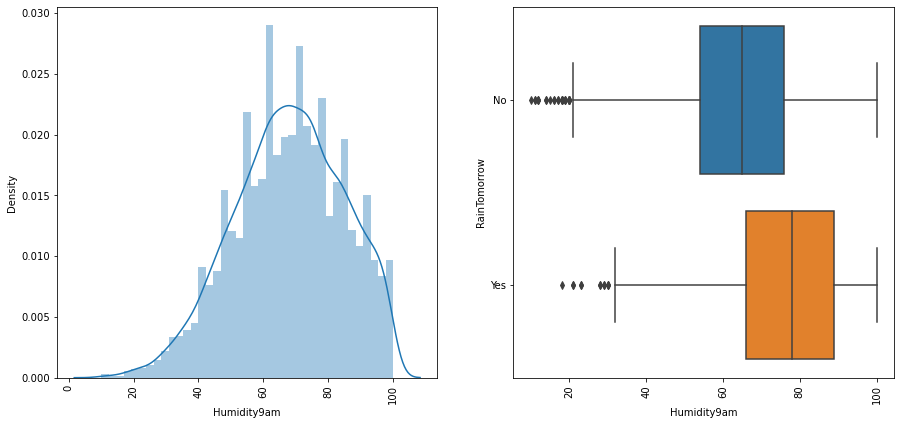

In [77]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['Humidity9am'])
plt.xlabel('Humidity9am')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Humidity9am', y= 'RainTomorrow', data= we)
plt.xlabel('Humidity9am')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Humidity9am we conclude that data is negatively skewed with having highest density at around 64 from distplot and from boxplot we conclude that outliers of Humidity9am are present in both categories of RainTomorrow.

15. Humidity3pm

In [78]:
we['Humidity3pm'].unique()

array([22., 25., 30., 16., 33., 23., 19.,  9., 27., 91., 93., 43., 32.,
       28., 82., 65., 26., 24., 17., 15., 70., 12.,  8., 31., 20., 10.,
       21., 39., 13., 11., 69., 18., 14., 35., 90., 68., 74., 41., 34.,
       78., 49., 37., 42., 47., 52., 29., 86., 89., 62., 79., 48., 46.,
       38., 44., 51., 36., 45., 40., 53., 61., 59., 63., 54., 57., 50.,
       58., 75., 97., 80., 95., 56., 72., 60., 71., 73., 81., 76., 64.,
       87., 85., 67., 55., 77., 84.,  7., 99., 92., 66., 83., 94., 96.,
       88., nan, 98.,  6.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [79]:
we['Humidity3pm'] = we['Humidity3pm'].fillna(method= 'bfill')

In [80]:
we['Humidity3pm'].isnull().sum()

0

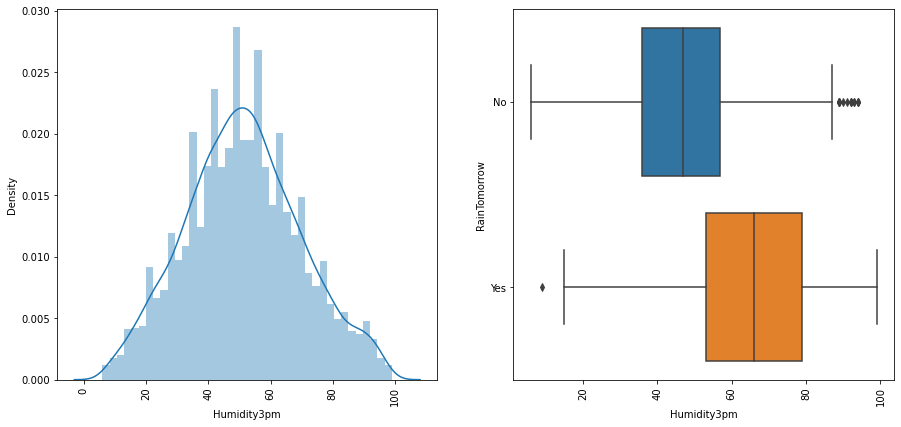

In [81]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['Humidity3pm'])
plt.xlabel('Humidity3pm')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Humidity3pm', y= 'RainTomorrow', data= we)
plt.xlabel('Humidity3pm')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Humidity3pm we conclude that data is positively skewed with data is having highest density at around 50 from distplot and from boxplot we conclude that outliers of Humidity3pm are present in both categories of RainTomorrow.

16. Pressure9am

In [82]:
we['Pressure9am'].unique()

array([1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009.2, 1009.6, 1013.4,
       1008.9, 1007. , 1011.8, 1010.5,  994.3, 1001.2, 1009.7, 1012.2,
       1005.8, 1009.4, 1019.2, 1019.3, 1013.6, 1007.8, 1011. , 1012.9,
       1010.9, 1006.8, 1005.2, 1004.8, 1005.6, 1006.1, 1004.5, 1014.4,
       1018.7, 1015.1, 1012.6, 1011.9, 1017.8, 1009.9, 1014.1, 1015.7,
       1011.6, 1008.4, 1019.7, 1015.8, 1010.1, 1005.3, 1007.9, 1005.4,
       1016.5, 1017.7, 1014.9, 1014.6, 1014.2, 1012.5, 1011.7, 1008.8,
       1005.9, 1008. , 1008.2, 1009.3, 1012.8, 1017. , 1023.3, 1022.5,
       1016.2, 1017.2, 1012.4, 1015.6, 1013. , 1014. , 1016.6, 1007.5,
       1014.7, 1014.5, 1013.7, 1015.2, 1019.5, 1021.3, 1017.4, 1012.7,
       1013.3, 1016.3, 1014.8, 1019.1, 1023. , 1023.8, 1022.4, 1023.2,
       1022.6, 1018.8, 1019.8, 1020.4, 1021.8, 1026.7, 1027.1, 1024.2,
       1021.5, 1024.4, 1024.1, 1018.5, 1022.8, 1022.7, 1023.6, 1025.2,
       1026. , 1004. , 1013.8, 1018. , 1023.1, 1023.4, 1026.9, 1028.7,
      

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [83]:
we['Pressure9am'] = we['Pressure9am'].fillna(method= 'bfill')

In [84]:
we['Pressure9am'].isnull().sum()

0

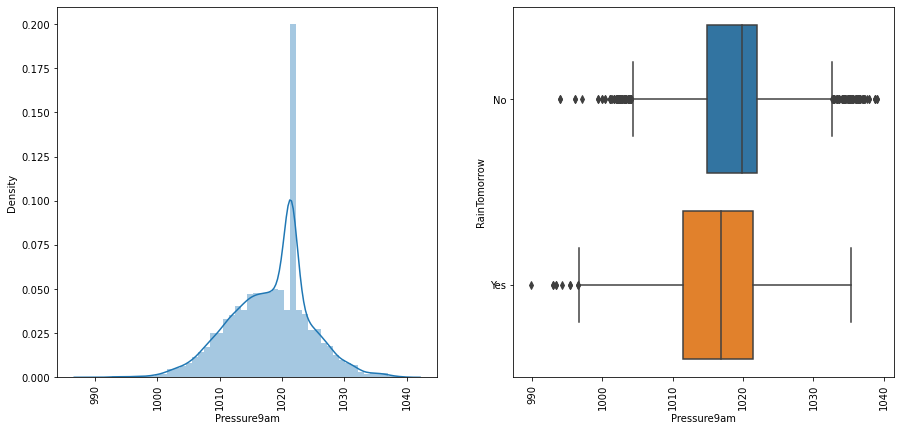

In [85]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['Pressure9am'])
plt.xlabel('Pressure9am')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Pressure9am', y= 'RainTomorrow', data= we)
plt.xlabel('Pressure9am')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Pressure9am we conclude that data is somewhat positively skewed with data having highest density at around 1024 from distplot and from boxplot we conclude that outliers of Pressure9am are present in both categories of RainTomorrow.

17. Pressure3pm

In [86]:
we['Pressure3pm'].unique()

array([1007.1, 1007.8, 1008.7, 1012.8, 1006. , 1005.4, 1008.2, 1010.1,
       1003.6, 1005.7, 1004.2,  993. , 1001.8, 1010.3, 1010.4, 1002.2,
       1009.7, 1017.1, 1014.8, 1008.1, 1007.6, 1001.7, 1003.4, 1005.1,
       1003.2, 1013.1, 1009.2, 1006.7, 1002.7, 1010.9, 1013.7, 1006.8,
       1012.1, 1006.9, 1012.7, 1017.4, 1016.2, 1010.6, 1004.8, 1005.9,
        997.8, 1003.9, 1014.6, 1014.1, 1011.6, 1011.8, 1010.2, 1010.5,
       1007.4, 1004.7, 1002.6, 1005. , 1003.8, 1006.5, 1008.5, 1011.1,
       1017.3, 1019.7, 1016.4, 1013.8, 1013.5, 1007.5, 1004.5, 1010.8,
       1012.4, 1013.4, 1015. , 1012.6, 1004.6, 1009. , 1012. , 1014.7,
       1015.9, 1018. , 1018.9, 1008. , 1013.2, 1013.9, 1013.6, 1014.4,
       1019.2, 1017.2, 1020.7, 1020.6, 1019.1, 1019.5, 1019.4, 1018.4,
       1012.9, 1019.3, 1016.5, 1019.6, 1023.5, 1023.4, 1017.7, 1020.3,
       1020.8, 1018.7, 1009.8, 1016.8, 1020. , 1020.9, 1021.6, 1015.7,
       1002.4, 1000.9, 1003.3, 1018.3, 1021.5, 1023.2, 1024. , 1025.9,
      

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [87]:
we['Pressure3pm'] = we['Pressure3pm'].fillna(method= 'bfill')

In [88]:
we['Pressure3pm'].isnull().sum()

0

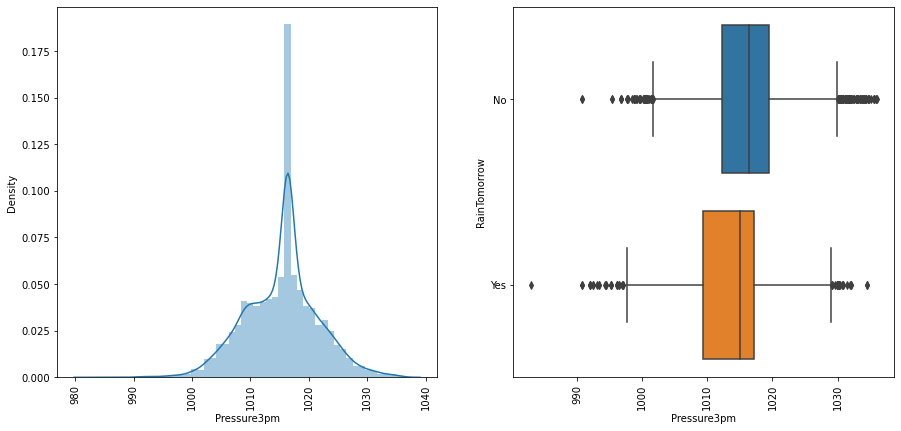

In [89]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['Pressure3pm'])
plt.xlabel('Pressure3pm')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Pressure3pm', y= 'RainTomorrow', data= we)
plt.xlabel('Pressure3pm')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Pressure3pm we conclude that data is somewhat is positively skewed with having highest density at around 1017 from distplot and from boxplot we conclude that outliers of Pressure3pm are present in both categories of RainTomorrow.

18. Cloud9am

In [90]:
we['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [91]:
we['Cloud9am'] = we['Cloud9am'].fillna(method= 'bfill')

In [92]:
we['Cloud9am'].isnull().sum()

0

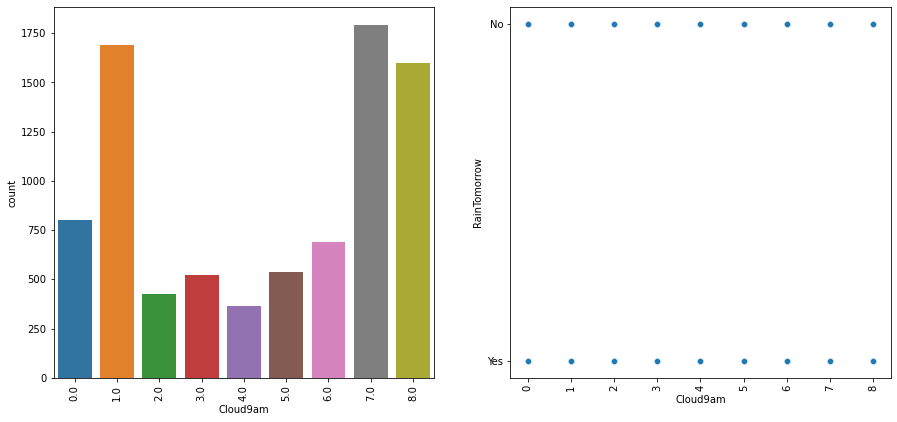

In [93]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(we['Cloud9am'])
plt.xlabel('Cloud9am')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Cloud9am', y= 'RainTomorrow', data= we)
plt.xlabel('Cloud9am')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both grphs of Cloud9am we conclude that most of data is present at category 7 of Cloud9am from countplot and from scatterplot we conclude that every category of Cloud9am is present in both categories of RainTomorrow.

19. Cloud3pm

In [94]:
we['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [95]:
we['Cloud3pm'] = we['Cloud3pm'].fillna(method= 'bfill')

In [96]:
we['Cloud3pm'].isnull().sum()

0

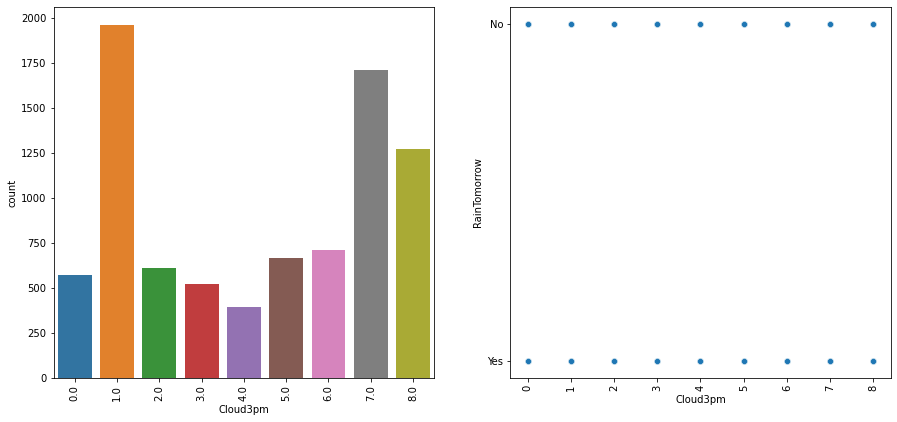

In [97]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(we['Cloud3pm'])
plt.xlabel('Cloud3pm')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Cloud3pm', y= 'RainTomorrow', data= we)
plt.xlabel('Cloud3pm')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Cloud3pm we conclude that most of data is present at category 1 of Cloud3pm from countplot and from scatterplot we conclude that every category of Cloud3pm is present in both categories of RainTomorrow.

20. Temp9am

In [98]:
we['Temp9am'].unique()

array([16.9, 17.2, 21. , 18.1, 17.8, 20.6, 16.3, 18.3, 20.1, 20.4, 15.9,
       17.4, 15.8, 17.3, 18. , 15.5, 19.1, 24.5, 23.8, 20.9, 21.5, 23.2,
       26.6, 24.6, 21.6, 12.5, 19.7, 14.9, 17.1, 20.7, 22.4, 23.1, 25.2,
       17.9, 20.2, 22.8, 24.2, 24.3, 25.6, 27.6, 16. , 22. , 26.8, 27.3,
       26.1, 23.3, 21.2, 23.4, 25.8, 28.2, 29. , 29.2, 29.9, 32.4, 28.8,
       27.2, 25.5, 26.5, 28.7, 29.6, 34.5, 18.7, 16.7, 17. , 19.2, 21.4,
       22.1, 19.3, 15. , 20. , 22.2, 23. , 15.6, 13.9, 12.6, 13.3, 17.6,
       18.6, 19. , 19.9, 12.7, 12.2, 12.1, 14.7, 18.8, 15.4, 16.2, 16.5,
       14. , 16.6, 18.4, 12.9, 13.8, 15.1, 16.4, 16.1, 20.5,  9.6, 12.4,
       14.1, 11.2,  9.5,  7.6, 10.1,  8.2,  7.9,  7.2, 10.6, 10.3, 10. ,
        8.3, 11. ,  9.4, 11.7,  8.5,  9.1,  7.5, 13. ,  7. ,  8.8,  7.4,
       11.9, 11.6, 13.6,  7.1, 10.2,  8. ,  9.2, 11.3,  4.7,  6.8,  4.9,
        2.2,  1.9,  5.9,  6.5,  5.4,  6.6,  5.6,  6.9,  8.4,  9.8, 13.5,
        7.8,  2.3,  2.4,  3.3,  3.8,  4.8,  8.1,  9

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [99]:
we['Temp9am'] = we['Temp9am'].fillna(method= 'bfill')

In [100]:
we['Temp9am'].isnull().sum()

0

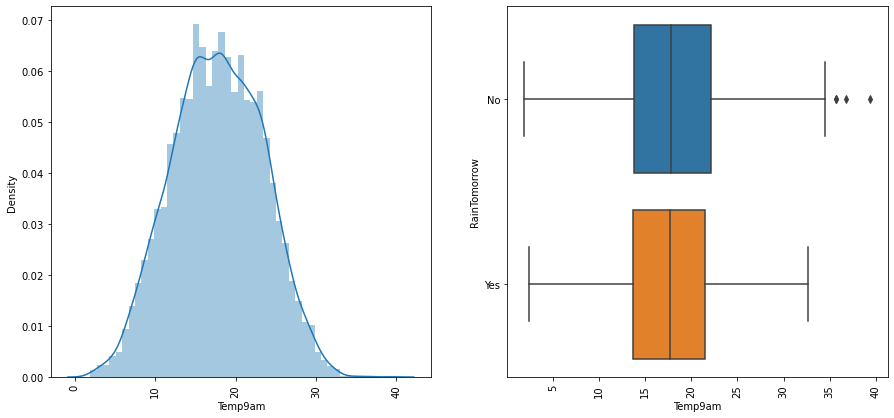

In [101]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['Temp9am'])
plt.xlabel('Temp9am')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Temp9am', y= 'RainTomorrow', data= we)
plt.xlabel('Temp9am')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Temp9am we conclude that data is somewhat is positively skewed with having highest density around 13 from distplot and from boxplot we conclude that outliers of Temp9am are present in only No category of RainTomorrow.

21. Temp3pm

In [102]:
we['Temp3pm'].unique()

array([21.8, 24.3, 23.2, 26.5, 29.7, 28.9, 24.6, 25.5, 30.2, 28.2, 28.8,
       17. , 15.8, 19.8, 23.5, 26.2, 18.1, 21.5, 21. , 27.3, 31.6, 30.8,
       29. , 31.2, 33. , 32.1, 26.1, 18.2, 22.7, 25.7, 22.1, 33.9, 34.4,
       36.8, 38.4, 27.6, 26.6, 29.3, 30. , 33.2, 35.7, 41.5, 27.1, 25.8,
       30.5, 37.7, 36.1, 33.1, 36.5, 36.2, 39.2, 40.1, 41.2, 42. , 41.9,
       37.1, 35.2, 39.7, 41.6, 43.4, 38.5, 29.4, 24.9, 17.3, 28.5, 29.2,
       29.5, 27. , 30.7, 32.7, 26.8, 29.8, 31.3, 33.4, 28.6, 33.6, 28.1,
       21.9, 21.4, 22. , 29.6, 18.8, 23.8, 19.7, 18.3, 20.5, 23.9, 27.2,
       32.6, 33.5, 31.4, 19.6, 27.7, 29.9, 30.9, 27.4, 20.3, 21.2, 20.9,
       21.6, 25. , 24.4, 23.1, 18.9, 19.4, 22.9, 23.6, 21.3, 22.3, 22.6,
       15.1, 14.5, 11.6,  9.4, 14. , 12.1, 16.1, 16.3, 19.1, 18.5, 18.4,
       19.2, 20.2, 17.7, 18. , 14.6, 15.3, 15.9, 14.7, 18.7, 21.7, 20.8,
       19.5, 17.4, 15.6, 16.7, 16.8, 13.4, 13. , 16.5, 10.2, 11.5, 11.4,
        7.9,  9.7,  8.8, 15.5, 13.9, 15.4, 14.9, 16

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [103]:
we['Temp3pm'] = we['Temp3pm'].fillna(method= 'bfill')

In [104]:
we['Temp3pm'].isnull().sum()

0

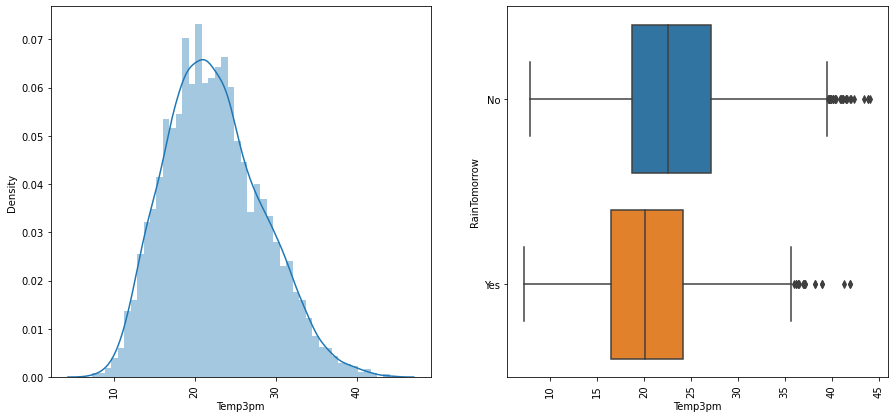

In [105]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(we['Temp3pm'])
plt.xlabel('Temp3pm')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Temp3pm', y= 'RainTomorrow', data= we)
plt.xlabel('Temp3pm')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Temp3pm we conclude that data is positively skewed with having highest density at around 16 from distplot and from boxplot we conclude that outliers of Temp3pm are present in both categories of RainTomorrow.

22. RainToday

In [106]:
we['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [107]:
we['RainToday'] = we['RainToday'].fillna(method= 'bfill')

In [108]:
we['RainToday'].isnull().sum()

0

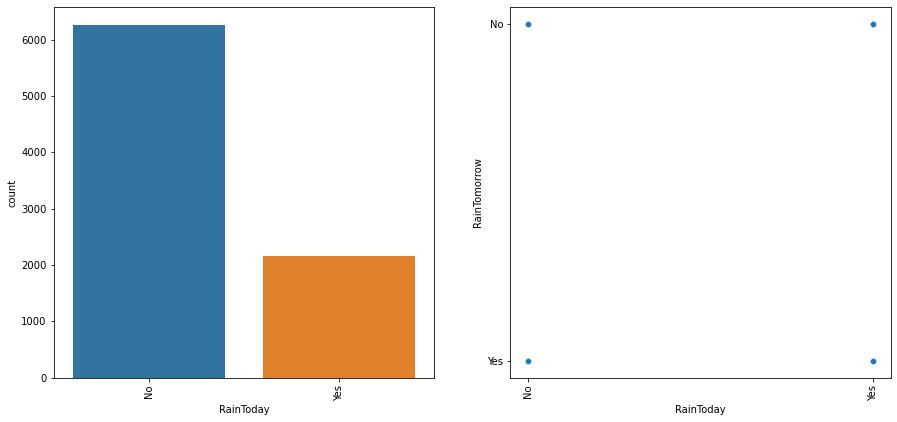

In [109]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(we['RainToday'])
plt.xlabel('RainToday')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'RainToday', y= 'RainTomorrow', data= we)
plt.xlabel('RainToday')
plt.xticks(rotation= 90)
plt.ylabel('RainTomorrow')
plt.show()

By looking at both graphs of Raintoday we conclude that most data is present in No category of RainToday from countplot and from scatterplot we conclude that both categories of RainToday is present in both categories of RainTomorrow.

#### Now changing data type of every column to int or float data type.

In [110]:
we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [111]:
we['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [112]:
we['Location'] = we['Location'].replace(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
                                         'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
                                         'Darwin', 'Uluru'], np.arange(0,12))

In [113]:
we['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [114]:
we['WindGustDir'] = we['WindGustDir'].replace(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
                                              'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], np.arange(0,16))

In [115]:
we['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [116]:
we['WindDir9am'] = we['WindDir9am'].replace(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
                                             'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], np.arange(0,16))

In [117]:
we['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [118]:
we['WindDir3pm'] = we['WindDir3pm'].replace(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
                                              'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], np.arange(0,16))

In [119]:
we['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [120]:
we['RainToday'] = we['RainToday'].replace(['Yes','No'],[1,0])

#### Now we will create heatmap to check the correlation of columns with target column.

In [121]:
we['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [122]:
we['RainTomorrow'] = we['RainTomorrow'].replace(['Yes','No'],[1,0])

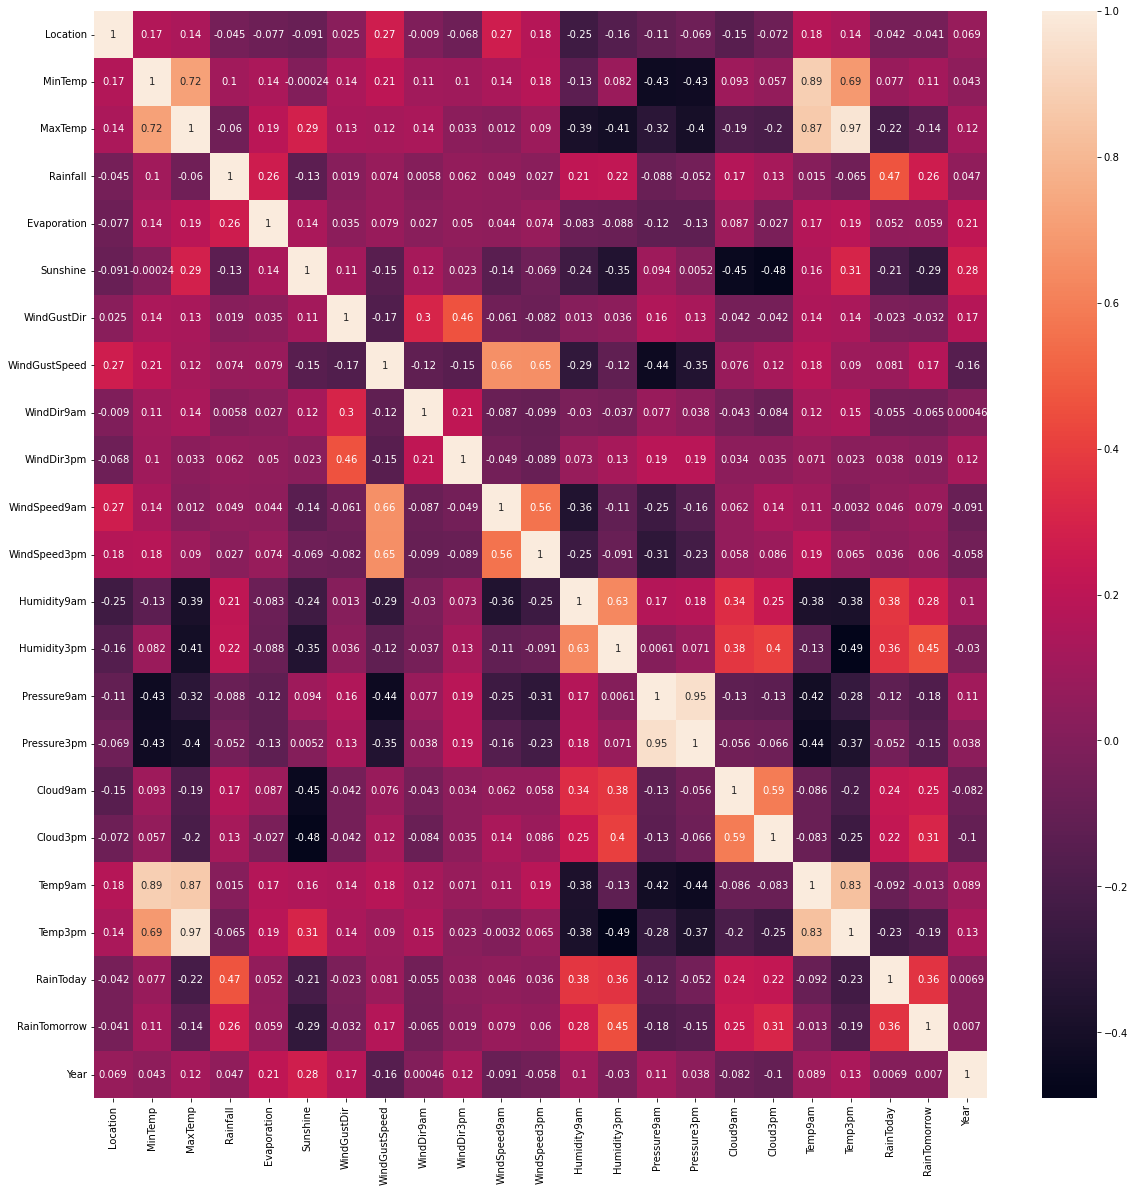

In [123]:
plt.figure(figsize= [20,20])
sns.heatmap(we.corr(), annot= True)
plt.show()

By looking at heat we conclude that target column (RainTomorrow) is having high positive correlation with foloowing columns (MinTemp, Rainfall, WindGustSpeed, Humidity9am, Humidity3pm, Cloud9am, Cloud3pm and RainToday) and it is having high negative correlation with following columns (MaxTemp, Sunshine, Pressure9am, Pressure3pm and Temp3pm). So we can drop following columns (Location, Evaporation, WindGustDir, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Temp9am and Year) to reduce multicollinearity and refine the dataset.

In [124]:
we.drop(['Location','Evaporation','WindGustDir','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Temp9am','Year'], axis= 1, inplace= True)

#### Now checking various models on dataset to find best model suited for the dataset to work on.

1. Logistic Regression Model

In [125]:
X = we.drop(['RainTomorrow'], axis= 1)
y = we['RainTomorrow']

In [126]:
scaler = StandardScaler()
lr = LogisticRegression()
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [127]:
trainaccuracy = []
testaccuracy = []
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lrf.fit(scaledX_train, y_train)
    trainaccuracy.append(lrf.score(scaledX_train, y_train))
    testaccuracy.append(lrf.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.8269673947451724
Test accuracy :  0.8260844803037495


2. Decision Tree Classification Model

In [128]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [129]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dtf.fit(scaledX_train, y_train)
    trainaccuracy.append(dtf.score(scaledX_train, y_train))
    testaccuracy.append(dtf.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.8328157644824311
Test accuracy :  0.8256905552918842


3. Random Forest Classification Model

In [130]:
rf = RandomForestClassifier(criterion= 'entropy')
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [131]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rff.fit(scaledX_train, y_train)
    trainaccuracy.append(rff.score(scaledX_train, y_train))
    testaccuracy.append(rff.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.8367173156062044
Test accuracy :  0.8277899066603386


4. Bagging Classification Model

In [132]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))
bcf = GridSearchCV(bc, param_grid= {'n_estimators': [10,20,30,40,50], 'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [133]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    bcf.fit(scaledX_train, y_train)
    trainaccuracy.append(bcf.score(scaledX_train, y_train))
    testaccuracy.append(bcf.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.8163295346628681
Test accuracy :  0.8094375889890841


5. Support Vector Classification Model

In [134]:
sv = SVC()
svf = GridSearchCV(sv, param_grid= {'kernel': ['linear', 'rbf'], 'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [135]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    svf.fit(scaledX_train, y_train)
    trainaccuracy.append(svf.score(scaledX_train, y_train))
    testaccuracy.append(svf.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.8272307692307692
Test accuracy :  0.8163455149501662


#### By observing the performances of all models we can conclude that best suited model for the dataset is Random Forest Classification model on the basis of best test score it is giving out of all the models.

In [136]:
we['RainTomorrow'].unique()

array([0, 1], dtype=int64)

In [137]:
we['RainTomorrow'] = we['RainTomorrow'].replace([0,1],['No','Yes'])

In [138]:
X = we.drop(['RainTomorrow'], axis= 1)
y = we['RainTomorrow']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 151)

In [140]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [141]:
rff.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [142]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 1, min_samples_split= 4)

In [143]:
pred = rf.fit(scaledX_train, y_train).predict(scaledX_test)

In [144]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': pred})

In [145]:
df.head()

,Actual,Prediction
34,No,No
1134,No,No
1202,Yes,Yes
4874,No,No
6993,No,No


#### Now checking performance of model by using various metrices

In [146]:
print('accuracy score : ', metrics.accuracy_score(y_test, pred))

accuracy score :  0.8305647840531561


In [147]:
print('confusion matrix : ')
metrics.confusion_matrix(y_test, pred)

confusion matrix : 


array([[1515,   79],
       [ 278,  235]], dtype=int64)

In [148]:
print('cohen kappa score : ', metrics.cohen_kappa_score(y_test, pred))

cohen kappa score :  0.47040360480875854


#### By observing the scores of various metrices we can conclude that the model is performing quite well as we can see that cohen kappa score is giving value above 0.40 which means model is good for the dataset. Now we need to save the model.

In [153]:
save_c = pickle.dumps(rf)

#### Hence we have saved the model. So, now we need to move on to predict second target column using regression models.

* 2. Using of Regression model on target column Rainfall.

#### Importing various libraries necessary for task to complete it.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR

In [3]:
w = pd.read_csv('./Downloads/weatherAUS.csv')

In [4]:
w.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### We don't need to check for dimensions, description and pressence of null values in dataset as we have done it above for the previous target column. So we already know that there is pressence of null values in it and also we just need to do bivariate analysis of every column as we have done the univariate analysis of every column for the previous target column. So now lets jump straight to EDA.

In [5]:
w.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

1. Date

In [6]:
w['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2013-06-06',
       '2013-06-07', '2013-06-08'], dtype=object)

we need to extract the year information from it and that we can use it.

In [7]:
ab = []
for i in w['Date']:
    i = i[:4]
    ab.append(i)

In [8]:
w['Year'] = pd.Series(ab)

We can also observe that null values are present in target column (Rainfall). So we need to fill it first before plotting the graph.

In [9]:
w['Rainfall'] = w['Rainfall'].fillna(method= 'bfill')

In [10]:
w['Rainfall'].isnull().sum()

0

In [11]:
w['Year'] = pd.to_numeric(w['Year'])

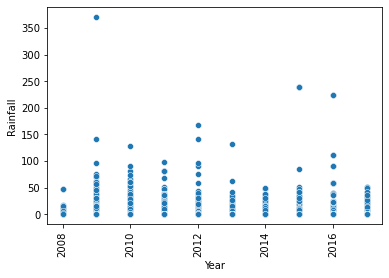

In [12]:
sns.scatterplot(x= 'Year', y= 'Rainfall', data= w)
plt.xlabel('Year')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at graph of Year we conclude that Rainfall has been happening in all range of Year. Also least amount Rainfall had happened in year 2008 and the Highest Rainfall was recorded in year 2009 which recorded above scale of 350.

2. Location

In [13]:
w['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

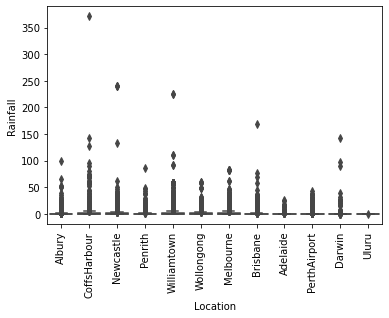

In [14]:
sns.boxplot(x= 'Location', y= 'Rainfall', data= w)
plt.xlabel('Location')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at boxplot of Location we can conclude that outliers of Location are present in whole range of Rainfall.

3. MinTemp

In [15]:
w['MinTemp'].unique()

array([13.4,  7.4, 12.9,  9.2, 17.5, 14.6, 14.3,  7.7,  9.7, 13.1, 15.9,
       12.6,  8.4,  9.8, 14.1, 13.5, 11.2, 11.5, 17.1, 20.5, 15.3, 16.2,
       16.9, 20.1, 19.7, 12.5, 12. , 11.3,  9.6, 10.5, 12.3, 13.7, 16.1,
       14. , 17. , 17.3, 17.2, 17.4, 19.8, 14.9, 13.9, 18.6, 19.3, 24.4,
       18.8, 20.8, 15.7, 18.5, 20.4, 21.8, 22.3, 22. , 28. , 21.5, 21.7,
       23.5, 28.3, 18.4, 12.4, 13.3, 18. , 18.7, 15.5,  8.9, 15. , 15.4,
       16. , 12.8, 13.2, 13.8,  7.6,  8.3, 11. , 20.9, 16.4, 10. ,  8.8,
        9.3, 14.4, 10.8, 10.1,  9.1, 10.4, 12.2, 10.7,  7.8,  8.1,  7.5,
        8.2, 11.6, 13. ,  9.9,  3.5,  6.6,  7. ,  5.7,  6.2,  6. , 10.6,
        8.6,  4.5,  5.4,  2.1,  1.8,  7.2,  4.6,  4.2,  5.2,  4.1,  3.2,
        4.3,  3.7,  3.6,  6.9, 10.3,  3. ,  2.6,  5.1,  4.4,  4.7,  6.7,
        8. ,  2.2,  1.7,  2.8,  9. ,  6.3, -2. , -1.3,  2. ,  0.5,  1.2,
        0.6,  0.9,  5. ,  3.9,  3.4,  0. , -1.5, -1.7, -0.4,  0.1,  4.8,
        5.9,  2.9, -0.6, -0.3, -1. ,  0.8, -0.1,  1

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [16]:
w['MinTemp'] = w['MinTemp'].fillna(method= 'bfill')

In [17]:
w['MinTemp'].isnull().sum()

0

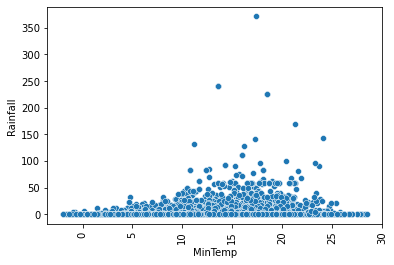

In [18]:
sns.scatterplot(x= 'MinTemp', y= 'Rainfall', data= w)
plt.xlabel('MinTemp')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of MinTemp we conclude that Rainfall occur across whole range Of MinTemp but most of time Rainfall occur with in range of 0 & 10. Also data is mostly concentrated in range of 10 to 20 for MinTemp and data is not showing any positive or negative correlation with target column (Rainfall).

4. MaxTemp

In [19]:
w['MaxTemp'].unique()

array([22.9, 25.1, 25.7, 28. , 32.3, 29.7, 25. , 26.7, 31.9, 30.1, 30.4,
       21.7, 18.6, 21. , 24.6, 27.7, 20.9, 22.5, 25.6, 29.3, 33. , 31.8,
       30.9, 32.4, 33.9, 32.7, 27.2, 24.2, 24.4, 26.5, 23.9, 28.8, 34.6,
       35.8, 37.9, 38.9, 28.3, 28.4, 30.8, 32. , 34.7, 37.7, 43. , 32.2,
       36.6, 39.9, 38.1, 34. , 35.2, 30.6, 34.3, 38.4, 38.2, 40.7, 41.5,
       42.9, 42.7, 43.1, 38.3, 36.9, 41.2, 42.2, 44.8, 40.2, 31.2, 27.3,
       21.6, 29. , 29.2, 31.3, 31.1, 29.1, 31.7, 33.2, 29.6, 32.6, 34.5,
       30.3, 22.1, 22. , 24. , 27.9, 30.2, 30.5, 25.8, 27. , 19.7, 21.9,
       25.3, 33.5, 33.6, 30. , 31.6, 22.3, 29.8, 27.6, 28.9, 29.9, 32.1,
       28.1, 21.4, 24.9, 25.4, 20. , 23.4, 22.7, 16.2, 15.8, 12.9, 11.5,
       14.5, 12.2, 16.5, 17. , 19.2, 18.9, 19.1, 18.8, 19.3, 18.4, 19. ,
       20.5, 19.5, 17.7, 18.5, 15.1, 16.3, 16.6, 16.4, 15.6, 19.8, 21.1,
       20.3, 18.1, 15.7, 16.8, 17.1, 14.3, 13.4, 17.4, 16.1, 10.5, 11.6,
       12. ,  8.8,  9.6,  8.2, 12.4, 14.9, 15.9, 14

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [20]:
w['MaxTemp'] = w['MaxTemp'].fillna(method= 'bfill')

In [21]:
w['MaxTemp'].isnull().sum()

1

In [22]:
w['MaxTemp'] = w['MaxTemp'].fillna(method= 'ffill')

In [23]:
w['MaxTemp'].isnull().sum()

0

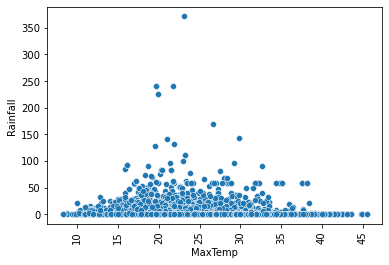

In [24]:
sns.scatterplot(x= 'MaxTemp', y= 'Rainfall', data= w)
plt.xlabel('MaxTemp')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of MaxTemp we conclude that Rainfall is occuring over whole range of MaxTemp and data is mostly concentrated with in range of 15 to 35 of MaxTemp. Also Mostly Rainfall occuring is with in range of 0 to 10 over whole range of MaxTemp.

5. Evaporation

In [25]:
w['Evaporation'].unique()

array([  nan,   8.6,   3.8,   2.8,   3.2,   6.8,   4.2,   1.6,   4.4,
         4. ,   2.2,   3.4,   6.4,   4.6,   3.6,   4.8,   3. ,   1.2,
         1.4,   2.6,   1. ,   2. ,   8.4,   2.4,   0.6,   5.4,   1.8,
         7. ,   0.8,   0.2,   5.2,   5. ,   6. ,   7.6,   5.8,   5.6,
         8. ,   6.2,   6.6,   7.8,   8.8,   7.4,   9.4,   7.2,   0.4,
         0. ,  18. ,  24.2,  14.6,  19.4,  10.8,  28. ,  11.8,  24.6,
        11.2,  22.6,  10. ,  37. ,  26. ,  11. ,  19.8,  24.4,  10.6,
        27.4,  12. ,  11.6,  24. ,   9. ,  23. ,  29.2,  20.6,  13.2,
        22.8,   9.8,  16. ,  20. ,  10.4,   9.6,  12.2,  15.4,  18.4,
        24.8,  20.8,  32. ,  55.4,  17.8,  16.2,  14.2,  59.2,  33.8,
        10.2, 145. ,  16.6,  47. ,  15.2,  15.8,  12.6,  11.4,   9.2,
        14.8,  13. ,   8.2,  13.6,  12.8,  12.4,  17.6,  19.2,  13.8,
        22.4,  18.6,  13.4,  17. ,  14. ,  14.4,  15. ,  15.6,   0.7])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [26]:
w['Evaporation'] = w['Evaporation'].fillna(method= 'bfill')

In [27]:
w['Evaporation'].isnull().sum()

39

In [28]:
w['Evaporation'] = w['Evaporation'].fillna(method= 'ffill')

In [29]:
w['Evaporation'].isnull().sum()

0

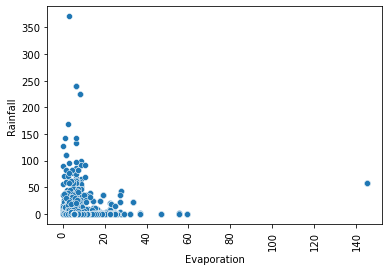

In [30]:
sns.scatterplot(x= 'Evaporation', y= 'Rainfall', data= w)
plt.xlabel('Evaporation')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of Evaporation we conclude that data is concentrated between within range of 0 to 40 of Evaporation and within range of 0 to 100 of Rainfall. Also we can observe that when Evaporation level is low, the Rainfall level is high.

6. Sunshine

In [31]:
w['Sunshine'].unique()

array([ nan,  9. ,  3.4,  6.1, 11. ,  7.1,  2.8,  6.7,  6.4,  6. ,  9.4,
        6.3, 11.1, 11.2, 11.4,  9.7,  7.9,  0.3,  0. ,  0.5,  3.5,  1.9,
        1.1,  7.8,  8.8,  1.8,  6.6,  3.1,  3. , 10.4, 10.5,  9.9,  9.5,
        1. ,  4.3,  9.2,  9.8,  4.8,  8.9,  4.5,  2.6, 10. , 10.2,  9.1,
        2.2,  0.4,  0.7,  0.2,  2.7,  8.5,  3.6,  2.5,  6.9,  8.2,  6.8,
        7.2,  9.6,  5.1,  5.8,  1.6,  0.6,  7.7,  8.3,  2.9,  8.4,  4.2,
        9.3,  4.7,  4.1,  5.3,  7.4,  7.3,  2.4, 10.6, 10.3, 10.1,  2.3,
       10.7,  8.6,  5.2, 10.9, 10.8,  8. ,  1.5,  8.7, 11.3, 11.5,  5.7,
       11.9,  3.3, 12.1, 12.4,  7. ,  4. , 11.7, 12.7, 12.5, 12.6, 13. ,
        5.5, 12.2, 11.6, 12.9, 13.1,  5.4,  3.7, 12. ,  2. ,  8.1, 13.2,
       13.6, 12.3, 11.8,  7.5,  6.2,  1.2,  3.8,  1.4,  5. ,  0.8,  4.4,
        6.5,  0.1,  4.9,  3.9,  4.6,  0.9,  5.9,  7.6,  1.3, 12.8, 13.4,
        1.7, 13.3,  3.2,  2.1, 13.5, 13.8, 13.9, 13.7,  5.6])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [32]:
w['Sunshine'] = w['Sunshine'].fillna(method= 'bfill')

In [33]:
w['Sunshine'].isnull().sum()

39

In [34]:
w['Sunshine'] = w['Sunshine'].fillna(method= 'ffill')

In [35]:
w['Sunshine'].isnull().sum()

0

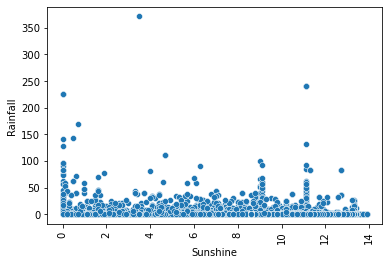

In [36]:
sns.scatterplot(x= 'Sunshine', y= 'Rainfall', data= w)
plt.xlabel('Sunshine')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of Sunshine we cocnlude that Rainfall is occuring over whole range of Sunshine and most range of Rainfall is occuring with in 0 to 20.

7. WindGustDir

In [37]:
w['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [38]:
w['WindGustDir'] = w['WindGustDir'].fillna(method= 'bfill')

In [39]:
w['WindGustDir'].isnull().sum()

1

In [40]:
w['WindGustDir'] = w['WindGustDir'].fillna(method= 'ffill')

In [41]:
w['WindGustDir'].isnull().sum()

0

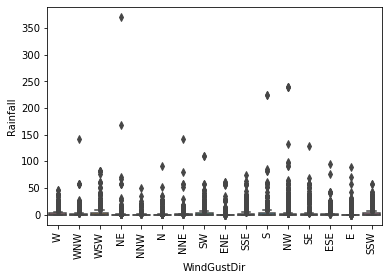

In [42]:
sns.boxplot(x= 'WindGustDir', y= 'Rainfall', data= w)
plt.xlabel('WindGustDir')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at boxplot of WindGustDir we conclude that outliers are present in Rainfall of every category of WindGustDir.

8. WindGustSpeed

In [43]:
w['WindGustSpeed'].unique()

array([ 44.,  46.,  24.,  41.,  56.,  50.,  35.,  80.,  28.,  30.,  31.,
        61.,  nan,  22.,  63.,  43.,  26.,  33.,  57.,  48.,  39.,  37.,
        52.,  98.,  54.,  83.,  59.,  70.,  69.,  17.,  20.,  19.,  15.,
        13.,  11.,  72.,  85.,  65.,  78., 107.,  74.,  67.,  94.,  76.,
        81.,  87.,   9.,  93.,   7.,  91.,  89., 102., 100.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [44]:
w['WindGustSpeed'] = w['WindGustSpeed'].fillna(method= 'bfill')

In [45]:
w['WindGustSpeed'].isnull().sum()

1

In [46]:
w['WindGustSpeed'] = w['WindGustSpeed'].fillna(method= 'ffill')

In [47]:
w['WindGustSpeed'].isnull().sum()

0

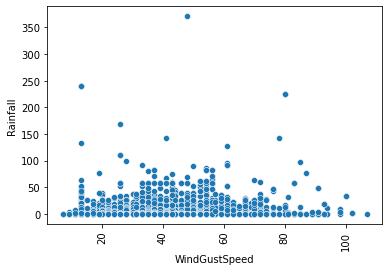

In [48]:
sns.scatterplot(x= 'WindGustSpeed', y= 'Rainfall', data= w)
plt.xlabel('WindGustSpeed')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of WindGustSpeed we conclude that mostly rainfall is occuring mostly over range of 0 to 100 of WindGustSpeed and mostly data is concentrated with in range of 20 to 60 of WindGustSpeed. Also it is not showing any positive or negative correlation with Rainfall.

9. WindDir9am

In [49]:
w['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [50]:
w['WindDir9am'] = w['WindDir9am'].fillna(method= 'bfill')

In [51]:
w['WindDir9am'].isnull().sum()

0

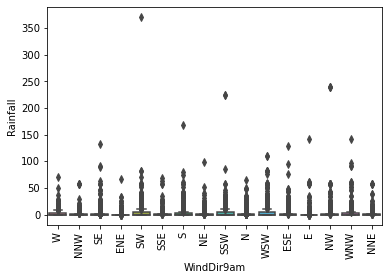

In [52]:
sns.boxplot(x= 'WindDir9am', y= 'Rainfall', data= w)
plt.xlabel('WindDir9am')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at boxplot of WindDir9am we cocnlude that outliers are present in Rainfall of every category of WindDir9am.

10. WindDir3pm

In [53]:
w['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [54]:
w['WindDir3pm'] = w['WindDir3pm'].fillna(method= 'bfill')

In [55]:
w['WindDir3pm'].isnull().sum()

0

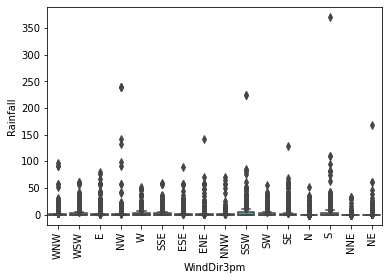

In [56]:
 sns.boxplot(x= 'WindDir3pm', y= 'Rainfall', data= w)
plt.xlabel('WindDir3pm')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at boxplot of WindDir3pm we conclude that outliers are present in Rainfall of every category of WindDir3pm

11. WindSpeed9am

In [57]:
w['WindSpeed9am'].unique()

array([20.,  4., 19., 11.,  7.,  6., 15., 17., 28., 24., nan,  9.,  0.,
       13.,  2., 26., 30., 22., 35., 37., 31., 33., 43., 41., 46., 39.,
       56., 54., 50., 52., 44., 61., 57., 48., 63.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [58]:
w['WindSpeed9am'] = w['WindSpeed9am'].fillna(method= 'bfill')

In [59]:
w['WindSpeed9am'].isnull().sum()

0

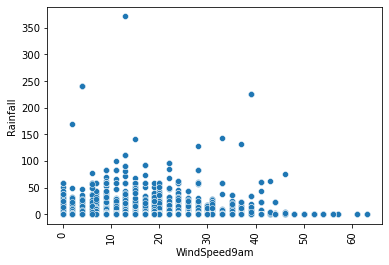

In [60]:
sns.scatterplot(x= 'WindSpeed9am', y= 'Rainfall', data= w)
plt.xlabel('WindSpeed9am')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of WindSpeed9am we conclude that Rainfall is occuring over almost all range of WindSpeed9am. Also data is concentrated with in range of WindSpeed9am from 0 to 40 and data is not showing any positive or negative correlation with target column (Rainfall)

12. WindSpeed3pm 

In [61]:
w['WindSpeed3pm'].unique()

array([24., 22., 26.,  9., 20., 17., 28., 11.,  6., 13., 30., 19., 31.,
        7., 15., 48.,  4., 33.,  0.,  2., nan, 37., 46., 39., 50., 35.,
       41., 44., 43., 65., 56., 83., 54., 61., 57., 52.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [62]:
w['WindSpeed3pm'] = w['WindSpeed3pm'].fillna(method= 'bfill')

In [63]:
w['WindSpeed3pm'].isnull().sum()

0

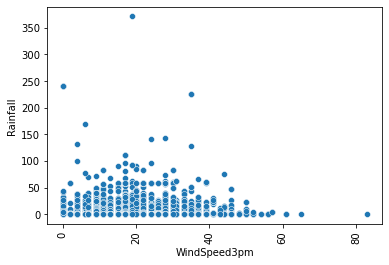

In [64]:
sns.scatterplot(x= 'WindSpeed3pm', y= 'Rainfall', data= w)
plt.xlabel('WindSpeed3pm')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of WindSpeed3pm we conclude that rainfall is occuring over almost all range of WindSpeed3pm. Data is also concentrated over range of WindSpeed3pm under 60 and most rainfall occuring ranges between 0 to 10.

13. Humidity9am

In [65]:
w['Humidity9am'].unique()

array([ 71.,  44.,  38.,  45.,  82.,  55.,  49.,  48.,  42.,  58.,  89.,
        76.,  65.,  57.,  50.,  69.,  80.,  47.,  56.,  54.,  41.,  78.,
        46.,  43.,  33.,  34.,  36.,  52.,  51.,  40.,  35.,  39.,  60.,
        37.,  27.,  32.,  53.,  20.,  66.,  63.,  62.,  87.,  61.,  59.,
        92.,  72.,  67.,  75.,  88.,  68.,  73.,  74.,  83.,  77.,  70.,
        81.,  86.,  97.,  99.,  91.,  85.,  93.,  84.,  94.,  79.,  98.,
        96.,  95.,  90.,  64.,  29.,  21., 100.,  30.,  23.,  nan,  31.,
        22.,  28.,  25.,  16.,  19.,  17.,  18.,  14.,  10.,  12.,  11.,
        24.,  26.,  15.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [66]:
w['Humidity9am'] = w['Humidity9am'].fillna(method= 'bfill')

In [67]:
w['Humidity9am'].isnull().sum()

0

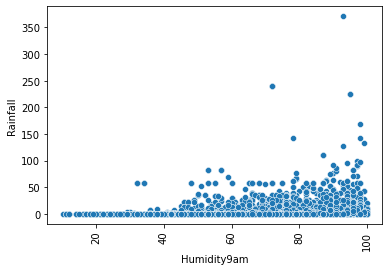

In [68]:
sns.scatterplot(x= 'Humidity9am', y= 'Rainfall', data= w)
plt.xlabel('Humidity9am')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of Humidity9am we conclude that rainfall is occuring over all range of Humidity9am and with increase in Humidity the rainfall is increasing but it is not showing quite exactly positive correlation. Also data is concentrated with in range of 40 to 100 of Humidity9am.

14. Humidity3pm

In [69]:
w['Humidity3pm'].unique()

array([22., 25., 30., 16., 33., 23., 19.,  9., 27., 91., 93., 43., 32.,
       28., 82., 65., 26., 24., 17., 15., 70., 12.,  8., 31., 20., 10.,
       21., 39., 13., 11., 69., 18., 14., 35., 90., 68., 74., 41., 34.,
       78., 49., 37., 42., 47., 52., 29., 86., 89., 62., 79., 48., 46.,
       38., 44., 51., 36., 45., 40., 53., 61., 59., 63., 54., 57., 50.,
       58., 75., 97., 80., 95., 56., 72., 60., 71., 73., 81., 76., 64.,
       87., 85., 67., 55., 77., 84.,  7., 99., 92., 66., 83., 94., 96.,
       88., nan, 98.,  6.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [70]:
w['Humidity3pm'] = w['Humidity3pm'].fillna(method= 'bfill')

In [71]:
w['Humidity3pm'].isnull().sum()

0

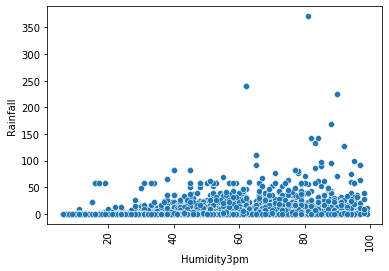

In [72]:
sns.scatterplot(x= 'Humidity3pm', y= 'Rainfall', data= w)
plt.xlabel('Humidity3pm')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of Humidity3pm we conclude that rainfall is occuring over all range of Humidity3pm. Data is also concentrated over range from 30 to 100 of Humidity3pm and mostly rainfall is ranging within range of 0 to 10.

15. Pressure9am

In [73]:
w['Pressure9am'].unique()

array([1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009.2, 1009.6, 1013.4,
       1008.9, 1007. , 1011.8, 1010.5,  994.3, 1001.2, 1009.7, 1012.2,
       1005.8, 1009.4, 1019.2, 1019.3, 1013.6, 1007.8, 1011. , 1012.9,
       1010.9, 1006.8, 1005.2, 1004.8, 1005.6, 1006.1, 1004.5, 1014.4,
       1018.7, 1015.1, 1012.6, 1011.9, 1017.8, 1009.9, 1014.1, 1015.7,
       1011.6, 1008.4, 1019.7, 1015.8, 1010.1, 1005.3, 1007.9, 1005.4,
       1016.5, 1017.7, 1014.9, 1014.6, 1014.2, 1012.5, 1011.7, 1008.8,
       1005.9, 1008. , 1008.2, 1009.3, 1012.8, 1017. , 1023.3, 1022.5,
       1016.2, 1017.2, 1012.4, 1015.6, 1013. , 1014. , 1016.6, 1007.5,
       1014.7, 1014.5, 1013.7, 1015.2, 1019.5, 1021.3, 1017.4, 1012.7,
       1013.3, 1016.3, 1014.8, 1019.1, 1023. , 1023.8, 1022.4, 1023.2,
       1022.6, 1018.8, 1019.8, 1020.4, 1021.8, 1026.7, 1027.1, 1024.2,
       1021.5, 1024.4, 1024.1, 1018.5, 1022.8, 1022.7, 1023.6, 1025.2,
       1026. , 1004. , 1013.8, 1018. , 1023.1, 1023.4, 1026.9, 1028.7,
      

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [74]:
w['Pressure9am'] = w['Pressure9am'].fillna(method= 'bfill')

In [75]:
w['Pressure9am'].isnull().sum()

0

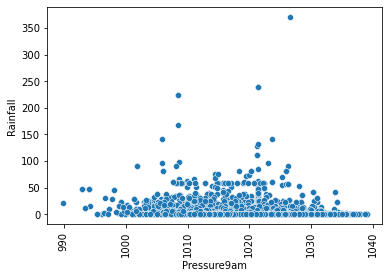

In [76]:
sns.scatterplot(x= 'Pressure9am', y= 'Rainfall', data= w)
plt.xlabel('Pressure9am')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of Pressure9am we conclude that rainfall is mostly occuring over range of Pressure9am above 990. Also data is concentrated over range above 1000 & below 1035. Also mostly rainfall is ranging between 0 to 10.

16. Pressure3pm

In [77]:
w['Pressure3pm'].unique()

array([1007.1, 1007.8, 1008.7, 1012.8, 1006. , 1005.4, 1008.2, 1010.1,
       1003.6, 1005.7, 1004.2,  993. , 1001.8, 1010.3, 1010.4, 1002.2,
       1009.7, 1017.1, 1014.8, 1008.1, 1007.6, 1001.7, 1003.4, 1005.1,
       1003.2, 1013.1, 1009.2, 1006.7, 1002.7, 1010.9, 1013.7, 1006.8,
       1012.1, 1006.9, 1012.7, 1017.4, 1016.2, 1010.6, 1004.8, 1005.9,
        997.8, 1003.9, 1014.6, 1014.1, 1011.6, 1011.8, 1010.2, 1010.5,
       1007.4, 1004.7, 1002.6, 1005. , 1003.8, 1006.5, 1008.5, 1011.1,
       1017.3, 1019.7, 1016.4, 1013.8, 1013.5, 1007.5, 1004.5, 1010.8,
       1012.4, 1013.4, 1015. , 1012.6, 1004.6, 1009. , 1012. , 1014.7,
       1015.9, 1018. , 1018.9, 1008. , 1013.2, 1013.9, 1013.6, 1014.4,
       1019.2, 1017.2, 1020.7, 1020.6, 1019.1, 1019.5, 1019.4, 1018.4,
       1012.9, 1019.3, 1016.5, 1019.6, 1023.5, 1023.4, 1017.7, 1020.3,
       1020.8, 1018.7, 1009.8, 1016.8, 1020. , 1020.9, 1021.6, 1015.7,
       1002.4, 1000.9, 1003.3, 1018.3, 1021.5, 1023.2, 1024. , 1025.9,
      

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [78]:
w['Pressure3pm'] = w['Pressure3pm'].fillna(method= 'bfill')

In [79]:
w['Pressure3pm'].isnull().sum()

0

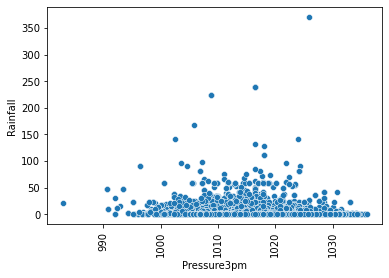

In [80]:
sns.scatterplot(x= 'Pressure3pm', y= 'Rainfall', data= w)
plt.xlabel('Pressure3pm')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of Pressure3pm we conclude that rainfall is occuring over range above 990 of Pressure3pm. Also most data is concentrated from range 995 to 1030 of Pressure3pm and mostly rainfall occuring is from range 0 to 10.

17. Cloud9am

In [81]:
w['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [82]:
w['Cloud9am'] = w['Cloud9am'].fillna(method= 'bfill')

In [83]:
w['Cloud9am'].isnull().sum()

0

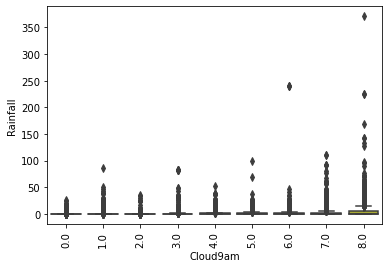

In [84]:
sns.boxplot(x= 'Cloud9am', y= 'Rainfall', data= w)
plt.xlabel('Cloud9am')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at boxplot of Cloud9am we conclude that outliers are present in Rainfall of every category of Cloud9am

18. Cloud3pm

In [85]:
w['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.])

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [86]:
w['Cloud3pm'] = w['Cloud3pm'].fillna(method= 'bfill')

In [87]:
w['Cloud3pm'].isnull().sum()

0

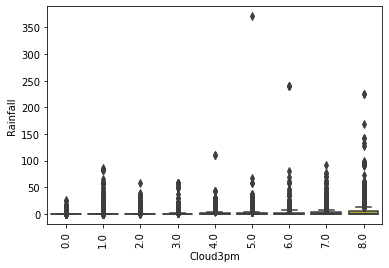

In [88]:
sns.boxplot(x= 'Cloud3pm', y= 'Rainfall', data= w)
plt.xlabel('Cloud3pm')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at boxplot of Cloud3pm we conclude that outliers are present in Rainfall of every category of Cloud3pm

19. Temp9am

In [89]:
w['Temp9am'].unique()

array([16.9, 17.2, 21. , 18.1, 17.8, 20.6, 16.3, 18.3, 20.1, 20.4, 15.9,
       17.4, 15.8, 17.3, 18. , 15.5, 19.1, 24.5, 23.8, 20.9, 21.5, 23.2,
       26.6, 24.6, 21.6, 12.5, 19.7, 14.9, 17.1, 20.7, 22.4, 23.1, 25.2,
       17.9, 20.2, 22.8, 24.2, 24.3, 25.6, 27.6, 16. , 22. , 26.8, 27.3,
       26.1, 23.3, 21.2, 23.4, 25.8, 28.2, 29. , 29.2, 29.9, 32.4, 28.8,
       27.2, 25.5, 26.5, 28.7, 29.6, 34.5, 18.7, 16.7, 17. , 19.2, 21.4,
       22.1, 19.3, 15. , 20. , 22.2, 23. , 15.6, 13.9, 12.6, 13.3, 17.6,
       18.6, 19. , 19.9, 12.7, 12.2, 12.1, 14.7, 18.8, 15.4, 16.2, 16.5,
       14. , 16.6, 18.4, 12.9, 13.8, 15.1, 16.4, 16.1, 20.5,  9.6, 12.4,
       14.1, 11.2,  9.5,  7.6, 10.1,  8.2,  7.9,  7.2, 10.6, 10.3, 10. ,
        8.3, 11. ,  9.4, 11.7,  8.5,  9.1,  7.5, 13. ,  7. ,  8.8,  7.4,
       11.9, 11.6, 13.6,  7.1, 10.2,  8. ,  9.2, 11.3,  4.7,  6.8,  4.9,
        2.2,  1.9,  5.9,  6.5,  5.4,  6.6,  5.6,  6.9,  8.4,  9.8, 13.5,
        7.8,  2.3,  2.4,  3.3,  3.8,  4.8,  8.1,  9

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [90]:
w['Temp9am'] = w['Temp9am'].fillna(method= 'bfill')

In [91]:
w['Temp9am'].isnull().sum()

0

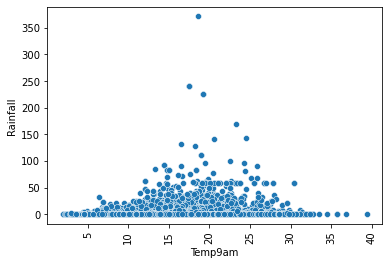

In [92]:
sns.scatterplot(x= 'Temp9am', y= 'Rainfall', data= w)
plt.xlabel('Temp9am')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of Temp9am we conclude that rainfall is occuring almost over all range of Temp9am. Data is concentrated mostly over range from 10 to 25 of Temp9am most rainfall occuring within range of 0 to 10.

20. Temp3pm

In [93]:
w['Temp3pm'].unique()

array([21.8, 24.3, 23.2, 26.5, 29.7, 28.9, 24.6, 25.5, 30.2, 28.2, 28.8,
       17. , 15.8, 19.8, 23.5, 26.2, 18.1, 21.5, 21. , 27.3, 31.6, 30.8,
       29. , 31.2, 33. , 32.1, 26.1, 18.2, 22.7, 25.7, 22.1, 33.9, 34.4,
       36.8, 38.4, 27.6, 26.6, 29.3, 30. , 33.2, 35.7, 41.5, 27.1, 25.8,
       30.5, 37.7, 36.1, 33.1, 36.5, 36.2, 39.2, 40.1, 41.2, 42. , 41.9,
       37.1, 35.2, 39.7, 41.6, 43.4, 38.5, 29.4, 24.9, 17.3, 28.5, 29.2,
       29.5, 27. , 30.7, 32.7, 26.8, 29.8, 31.3, 33.4, 28.6, 33.6, 28.1,
       21.9, 21.4, 22. , 29.6, 18.8, 23.8, 19.7, 18.3, 20.5, 23.9, 27.2,
       32.6, 33.5, 31.4, 19.6, 27.7, 29.9, 30.9, 27.4, 20.3, 21.2, 20.9,
       21.6, 25. , 24.4, 23.1, 18.9, 19.4, 22.9, 23.6, 21.3, 22.3, 22.6,
       15.1, 14.5, 11.6,  9.4, 14. , 12.1, 16.1, 16.3, 19.1, 18.5, 18.4,
       19.2, 20.2, 17.7, 18. , 14.6, 15.3, 15.9, 14.7, 18.7, 21.7, 20.8,
       19.5, 17.4, 15.6, 16.7, 16.8, 13.4, 13. , 16.5, 10.2, 11.5, 11.4,
        7.9,  9.7,  8.8, 15.5, 13.9, 15.4, 14.9, 16

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [94]:
w['Temp3pm'] = w['Temp3pm'].fillna(method= 'bfill')

In [95]:
w['Temp3pm'].isnull().sum()

0

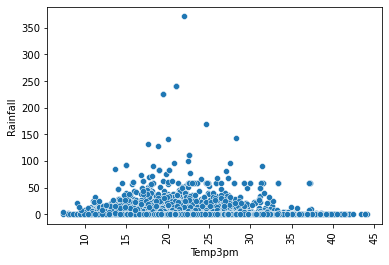

In [96]:
sns.scatterplot(x= 'Temp3pm', y= 'Rainfall', data= w)
plt.xlabel('Temp3pm')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at scatterplot of Temp3pm we conclude that rainfall is occuring over all range of Temp3pm. Data is concentrated mostly over range from 10 to 30 of Temp3pm and mostly rainfall occuring is within range 0 & 10.

21. RainToday

In [97]:
w['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [98]:
w['RainToday'] = w['RainToday'].fillna(method= 'bfill')

In [99]:
w['RainToday'].isnull().sum()

0

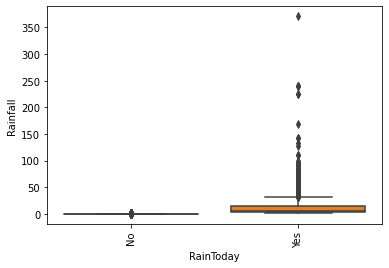

In [100]:
sns.boxplot(x= 'RainToday', y= 'Rainfall', data= w)
plt.xlabel('RainToday')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at boxplot of RainToday we conclude that outliers are present in rainfall of both categories of RainToday.

22. RainTomorrow

In [101]:
w['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

As we can see that there is pressence of null values in the column and we need to fill them randomly to ignore bias.

In [102]:
w['RainTomorrow'] = w['RainTomorrow'].fillna(method= 'bfill')

In [103]:
w['RainTomorrow'].isnull().sum()

1

In [104]:
w['RainTomorrow'] = w['RainTomorrow'].fillna(method= 'ffill')

In [105]:
w['RainTomorrow'].isnull().sum()

0

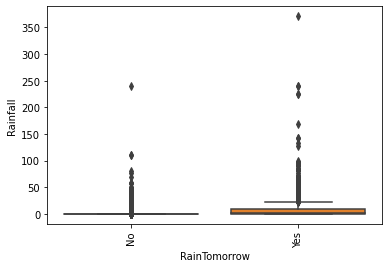

In [106]:
sns.boxplot(x= 'RainTomorrow', y= 'Rainfall', data= w)
plt.xlabel('RainTomorrow')
plt.xticks(rotation= 90)
plt.ylabel('Rainfall')
plt.show()

By looking at boxplot of RainTomorrow we conclude that outliers are present in rainfall of both categories of RainTomorrow.

#### Now we need to change data types of every column to int or float data type

In [107]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [108]:
w.drop(['Date'], axis= 1, inplace= True)

In [109]:
w['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [110]:
w['Location'] = w['Location'].replace(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
                                       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
                                       'Darwin', 'Uluru'], np.arange(0,12))

In [111]:
w['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [112]:
w['WindGustDir'] = w['WindGustDir'].replace(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
                                             'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], np.arange(0,16))

In [113]:
w['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [114]:
w['WindDir9am'] = w['WindDir9am'].replace(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
                                           'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], np.arange(0,16))

In [115]:
w['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [116]:
w['WindDir3pm'] = w['WindDir3pm'].replace(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
                                           'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], np.arange(0,16))

In [117]:
w['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [118]:
w['RainToday'] = w['RainToday'].replace(['No','Yes'],[0,1])

In [119]:
w['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [120]:
w['RainTomorrow'] = w['RainTomorrow'].replace(['No','Yes'],[0,1])

#### Now we need to create heatmap to check for multicollinearity.

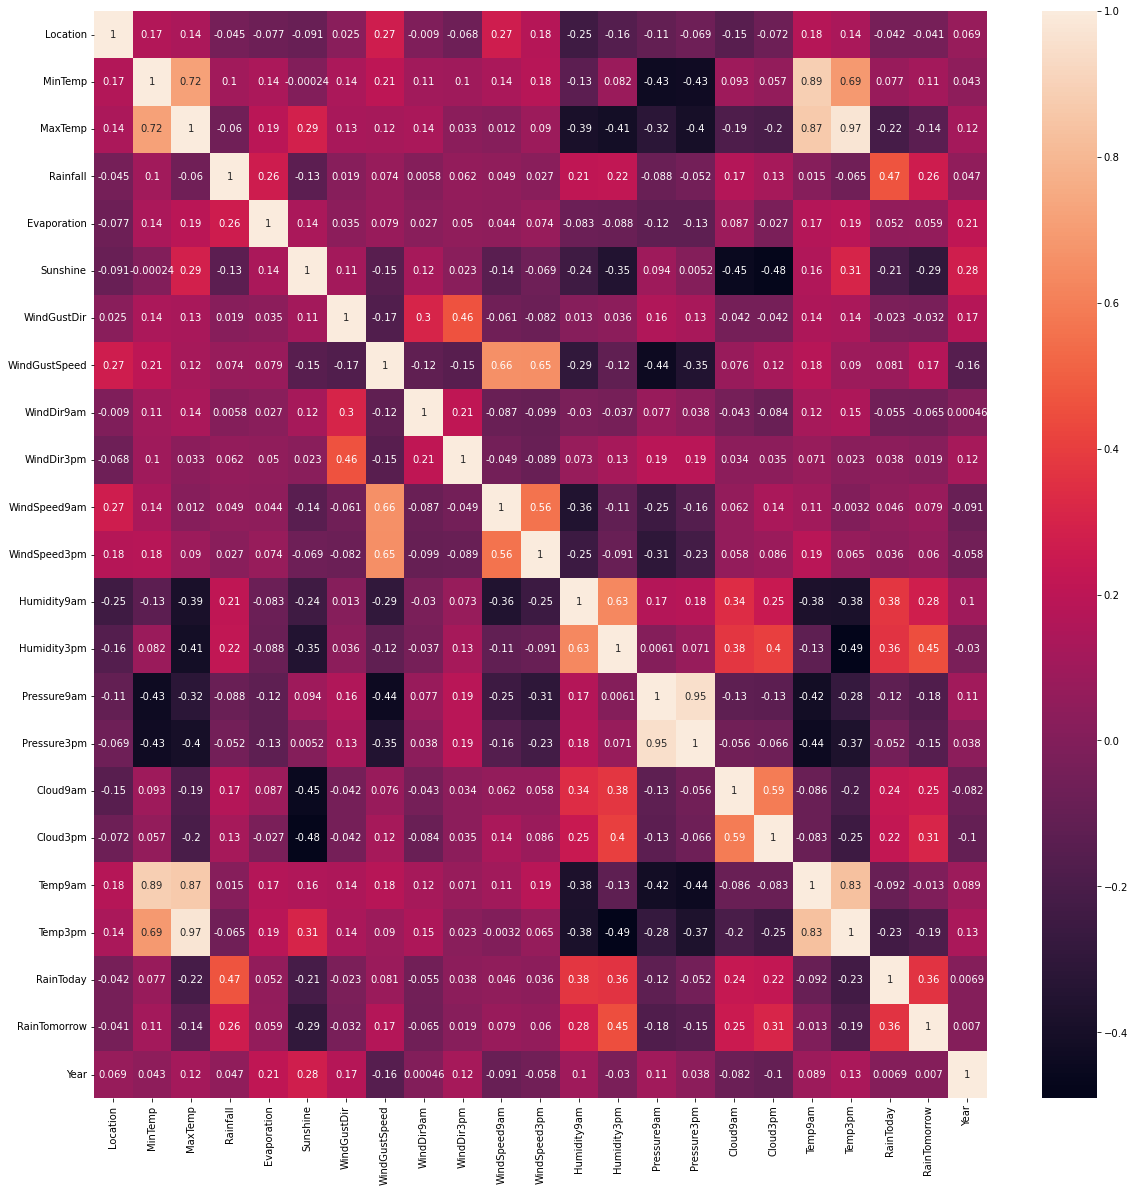

In [121]:
plt.figure(figsize= [20,20])
sns.heatmap(w.corr(), annot= True)
plt.show()

By looking at heatmap we conclude that target column (Rainfall) is having high positive correlation with following columns (RainTomorrow, RainToday, Cloud9am, Cloud3pm, Humidity9am, Humidity3pm, Evaporation & MinTemp) and it is having high negative correlation with following columns (Sunshine). So we can remove following columns (Year, Temp9am, Temp3pm, Pressure3pm, Pressure9am, WindSpeed9am, WindSpeed3pm, WindDir9am, WindDir3pm, WindGustSpeed, WindGustDir, MaxTemp and Location) to remove multicollinearity and refine the data.

In [122]:
w.drop(['Year','Temp9am','Temp3pm','Pressure9am', 'Pressure3pm', 'WindSpeed9am', 'WindSpeed3pm', 'WindDir9am', 'WindDir3pm',
        'WindGustSpeed', 'WindGustDir', 'MaxTemp', 'Location'], axis= 1, inplace= True)

#### Now we need to split the data and check various models performances on it to find the best suited model for the dataset.

In [123]:
X = w.drop(['Rainfall'], axis= 1)
y = w['Rainfall']

1. Linear Regression Model

In [125]:
lm = LinearRegression()
lmf = GridSearchCV(lm, param_grid= {'n_jobs': [1,2,3,4,5]}, scoring= 'r2', cv= 5)

In [126]:
scaler = StandardScaler()
trainaccuracy = []
testaccuracy = []
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lmf.fit(scaledX_train, y_train)
    trainaccuracy.append(lmf.score(scaledX_train, y_train))
    testaccuracy.append(lmf.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.2930156188889963
Test accuracy :  0.29203454346740415


2. Decision Tree Regression Model

In [127]:
dtr = DecisionTreeRegressor()
dtrf = GridSearchCV(dtr, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [128]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dtrf.fit(scaledX_train, y_train)
    trainaccuracy.append(dtrf.score(scaledX_train, y_train))
    testaccuracy.append(dtrf.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.32199060129641893
Test accuracy :  0.2986948883315447


3. Random Forest Regression Model

In [129]:
rfr = RandomForestRegressor()
rfrf = GridSearchCV(rfr, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [131]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rfrf.fit(scaledX_train, y_train)
    trainaccuracy.append(rfrf.score(scaledX_train, y_train))
    testaccuracy.append(rfrf.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.3596970938193725
Test accuracy :  0.31712448424523976


4. Bagging Regression Model

In [132]:
br = BaggingRegressor(base_estimator= DecisionTreeRegressor())
brf = GridSearchCV(br, param_grid= {'n_estimators': [10,20,30,40,50], 'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)

In [133]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    brf.fit(scaledX_train, y_train)
    trainaccuracy.append(brf.score(scaledX_train, y_train))
    testaccuracy.append(brf.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.2951571887203504
Test accuracy :  0.26228447097448765


5. Support Vector Regression Model

In [124]:
svr = SVR()
svrf = GridSearchCV(svr, param_grid= {'kernel': ['rbf','linear'], 'C': [1,2,3,4,5]}, scoring= 'r2', cv= 5)

In [126]:
trainaccuracy = []
testaccuracy = []
scaler = StandardScaler()
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    svrf.fit(scaledX_train, y_train)
    trainaccuracy.append(svrf.score(scaledX_train, y_train))
    testaccuracy.append(svrf.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.298091278263456
Test accuracy :  0.29193440364777123


#### By looking at performance of every model we conclude that none of the model is giving high r2_score but out of those models the best test r2_score is given by Random Forest Regression Model. Also, the performance of model cannot be determined by only r2_score. We need to check performance of model through various other metrices. 

In [127]:
rfr = RandomForestRegressor()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 111)

In [138]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [139]:
pred = rfr.fit(scaledX_train, y_train).predict(scaledX_test)

In [140]:
df1 = pd.DataFrame({'Actual': y_test, 'Prediction': np.round(pred, 1)})

In [141]:
df1.head()

,Actual,Prediction
4001,0.2,0.2
8360,0.0,0.1
3870,0.2,0.1
3975,0.0,0.0
4061,8.0,8.1


#### Now checking performance of model by using various metrices on it.

In [142]:
print('r2 score : ', metrics.r2_score(y_test, pred))

r2 score :  0.6134137587282004


In [143]:
print('root mean squared error : ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

root mean squared error :  6.988691876740811


In [144]:
print('mean absolute error : ', metrics.mean_absolute_error(y_test, pred))

mean absolute error :  2.339398259769024


#### So, by looking at metrices score of model we can conclude that model is performing quite well as the r2_score much better compare to its testing phase r2_score. Also root mean squared error value and mean absolute error value of the model is quite low. So we can say that model is working quite well on this dataset. Now we need to save the model.

In [145]:
save_r = pickle.dumps(rfr)

#### So by looking at both models we can conclude that for both classification and regression process Random Forest Model is performing best for both target variables. But performance of classification model is better then the performance of regression model as we can see. Hence, the objective of the task has been achieved.